Loading Hospital Readmissions Dataset 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the dataset 
df=pd.read_csv('hospital_readmissions.csv')

In [3]:
# Top 5 rows of the dataset
df.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,69,Other,Emergency,Heart Disease,33,2,4,1,1,5,NaN,Yes
1,2,32,Female,Urgent,Diabetes,81,10,4,4,1,6,NaN,No
2,3,78,Female,Urgent,Heart Disease,75,29,4,0,3,5,Normal,No
3,4,38,Male,Elective,Diabetes,77,11,2,3,4,9,NaN,Yes
4,5,41,Female,Urgent,Diabetes,50,25,3,4,1,3,NaN,Yes


Data Analysis

In [4]:
# Check the general structure of the dataset (number of rows and columns)
print("Number of rows and columns:", df.shape)

# Check for duplicate rows
duplicates = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f'The number of duplicate rows is: {num_duplicates}')

# Display unique value counts for each column in dataset
for column in df.columns:
    unique_counts = df[column].value_counts()
    print(f"\nUnique value counts for '{column}':")
    print(unique_counts)
    print("\n" + "=" * 50 + "\n")


Number of rows and columns: (1000, 13)
The number of duplicate rows is: 0

Unique value counts for 'Patient_ID':
Patient_ID
1       1
672     1
659     1
660     1
661     1
       ..
339     1
340     1
341     1
342     1
1000    1
Name: count, Length: 1000, dtype: int64



Unique value counts for 'Age':
Age
79    25
18    24
50    24
68    24
55    19
      ..
27    10
28     9
60     8
58     7
48     6
Name: count, Length: 68, dtype: int64



Unique value counts for 'Gender':
Gender
Male      346
Female    337
Other     317
Name: count, dtype: int64



Unique value counts for 'Admission_Type':
Admission_Type
Elective     345
Emergency    337
Urgent       318
Name: count, dtype: int64



Unique value counts for 'Diagnosis':
Diagnosis
Diabetes         272
Infection        247
Injury           244
Heart Disease    237
Name: count, dtype: int64



Unique value counts for 'Num_Lab_Procedures':
Num_Lab_Procedures
59    19
29    16
96    16
62    16
67    16
      ..
72     5
31     4
52


Patient_ID:
Each patient is uniquely identified in the dataset, with 1000 distinct patient IDs. Notably, every ID is associated with a singular count, confirming the absence of duplicate patient entries.

Age:
Diversity characterizes the age distribution, with the highest frequency (25 instances) occurring among 79-year-old patients. The dataset spans a broad age range, with the lowest count (6 occurrences) observed for individuals aged 48. This comprehensive age distribution offers valuable insights into the demographic composition of the patient population.

Gender:
The gender distribution is well-balanced, encompassing 346 males, 337 females, and 317 individuals falling under the 'others' category. This equilibrium suggests a representation of diverse gender identities within the dataset.

Admission_Type:
Predominantly, elective admissions lead the dataset with 345 occurrences, followed by emergency admissions (337) and urgent admissions (318). This distribution provides a nuanced understanding of the types of admissions captured in the dataset.

Diagnosis:
The dataset encompasses a variety of medical conditions, with diabetes being the most prevalent (272 occurrences), followed by infection (247), injury (244), and heart disease (237). This diversity mirrors the spectrum of diagnoses present in the patient population.

Num_Lab_Procedures:
The count of laboratory procedures spans from 1 to 96, with the highest frequency (19 occurrences) observed for 59 procedures. This variability underscores the differences in the extent of laboratory testing for each patient.

Num_Medications:
Patient medication patterns exhibit variability, ranging from 1 to 35 medications. The most common count (49 occurrences) is associated with patients prescribed 8 medications, providing valuable insights into medication trends within the dataset.

Num_Outpatient_Visits:
Patients exhibit diverse patterns of outpatient visits, with the highest frequency (209 occurrences) recorded for those with 2 outpatient visits. This distribution sheds light on the frequency of outpatient interactions within the patient cohort.

Num_Inpatient_Visits:
Inpatient visits display variability, with the highest count (228 occurrences) recorded for patients with 1 inpatient visit. This distribution unveils patterns in hospitalization frequencies among the patients.

Num_Emergency_Visits:
Emergency care utilization varies among patients, with the highest count (231 occurrences) associated with those having 1 emergency visit. This distribution provides insights into the frequency of emergency care sought by individuals.

Num_Diagnoses:
The number of diagnoses varies among patients, with the highest count (129 occurrences) recorded for those with 1 diagnosis. This distribution offers insights into the complexity of medical conditions within the dataset.

A1C_Result:
A1C test results are categorized as Abnormal (301 occurrences) and Normal (265 occurrences). This distribution highlights the prevalence of abnormal and normal A1C test results within the dataset.

Readmitted:
The dataset classifies patients into those who were readmitted (497 occurrences) and those who were not readmitted (503 occurrences). This binary distribution provides a clear representation of the readmission status of patients in the dataset.



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient_ID             1000 non-null   int64 
 1   Age                    1000 non-null   int64 
 2   Gender                 1000 non-null   object
 3   Admission_Type         1000 non-null   object
 4   Diagnosis              1000 non-null   object
 5   Num_Lab_Procedures     1000 non-null   int64 
 6   Num_Medications        1000 non-null   int64 
 7   Num_Outpatient_Visits  1000 non-null   int64 
 8   Num_Inpatient_Visits   1000 non-null   int64 
 9   Num_Emergency_Visits   1000 non-null   int64 
 10  Num_Diagnoses          1000 non-null   int64 
 11  A1C_Result             566 non-null    object
 12  Readmitted             1000 non-null   object
dtypes: int64(8), object(5)
memory usage: 101.7+ KB


Null Values:
The "A1C_Result" feature has 434 missing values (null values) out of 1000 entries. Addressing these missing values will be crucial during the data preprocessing phase to ensure the integrity and completeness of the dataset.

In [6]:
# To find if there are any missing values in the dataset
missing_values = df.isnull().sum()
total_entries = len(df)

# Print missing values count
print("\nMissing values count:")
print(missing_values)

# Print missing values percentage
print("\nPercentage of missing values:")
missing_percentage = (missing_values / total_entries) * 100
print(missing_percentage)

# Additional formatting for better readability
print("\n" + "=" * 50 + "\n")



Missing values count:
Patient_ID                 0
Age                        0
Gender                     0
Admission_Type             0
Diagnosis                  0
Num_Lab_Procedures         0
Num_Medications            0
Num_Outpatient_Visits      0
Num_Inpatient_Visits       0
Num_Emergency_Visits       0
Num_Diagnoses              0
A1C_Result               434
Readmitted                 0
dtype: int64

Percentage of missing values:
Patient_ID                0.0
Age                       0.0
Gender                    0.0
Admission_Type            0.0
Diagnosis                 0.0
Num_Lab_Procedures        0.0
Num_Medications           0.0
Num_Outpatient_Visits     0.0
Num_Inpatient_Visits      0.0
Num_Emergency_Visits      0.0
Num_Diagnoses             0.0
A1C_Result               43.4
Readmitted                0.0
dtype: float64





It's really important to deal with the missing values in the "A1C_Result" column since a significant portion (43.4%) of the data is currently not available. Taking care of this is crucial to ensure the data is reliable and our analyses are accurate.

In [7]:
from scipy.stats import skew

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['int64']).columns

# Calculate skewness for each numerical column
skewness_values = df[numerical_columns].apply(lambda x: skew(x.dropna()))

# Display skewness values
for column, skewness in zip(numerical_columns, skewness_values):
    print(f"\nSkewness for '{column}': {skewness}")

# Additional formatting for better readability
print("\n" + "=" * 50 + "\n")



Skewness for 'Patient_ID': 0.0

Skewness for 'Age': 0.7903468765473601

Skewness for 'Num_Lab_Procedures': -0.05169505114589861

Skewness for 'Num_Medications': 0.009148423782179171

Skewness for 'Num_Outpatient_Visits': -0.013133385867754801

Skewness for 'Num_Inpatient_Visits': 0.010826552320863589

Skewness for 'Num_Emergency_Visits': 0.08011874418224307

Skewness for 'Num_Diagnoses': -0.018800900660258444




Most of the numerical columns exhibit balanced distributions around their central points, as indicated by skewness values close to 0. Age and Num_Emergency_Visits show a slight inclination towards higher values, while Num_Lab_Procedures and Num_Diagnoses lean slightly towards lower values.

In [8]:
# Compute basic summary statistics for numerical features
numerical_summary = df.describe()

# Display the summary statistics
print("\nSummary Statistics for Numerical Features:")
print(numerical_summary)

# Additional formatting for better readability
print("\n" + "=" * 50 + "\n")



Summary Statistics for Numerical Features:
        Patient_ID          Age  Num_Lab_Procedures  Num_Medications  \
count  1000.000000  1000.000000         1000.000000      1000.000000   
mean    500.500000    51.665000           50.836000        15.661000   
std     288.819436    21.989459           28.075137         8.230177   
min       1.000000    18.000000            1.000000         1.000000   
25%     250.750000    34.000000           27.000000         9.000000   
50%     500.500000    50.500000           52.000000        16.000000   
75%     750.250000    69.000000           75.000000        23.000000   
max    1000.000000   150.000000           99.000000        35.000000   

       Num_Outpatient_Visits  Num_Inpatient_Visits  Num_Emergency_Visits  \
count            1000.000000           1000.000000           1000.000000   
mean                2.016000              2.019000              1.956000   
std                 1.399894              1.416561              1.409983   
min

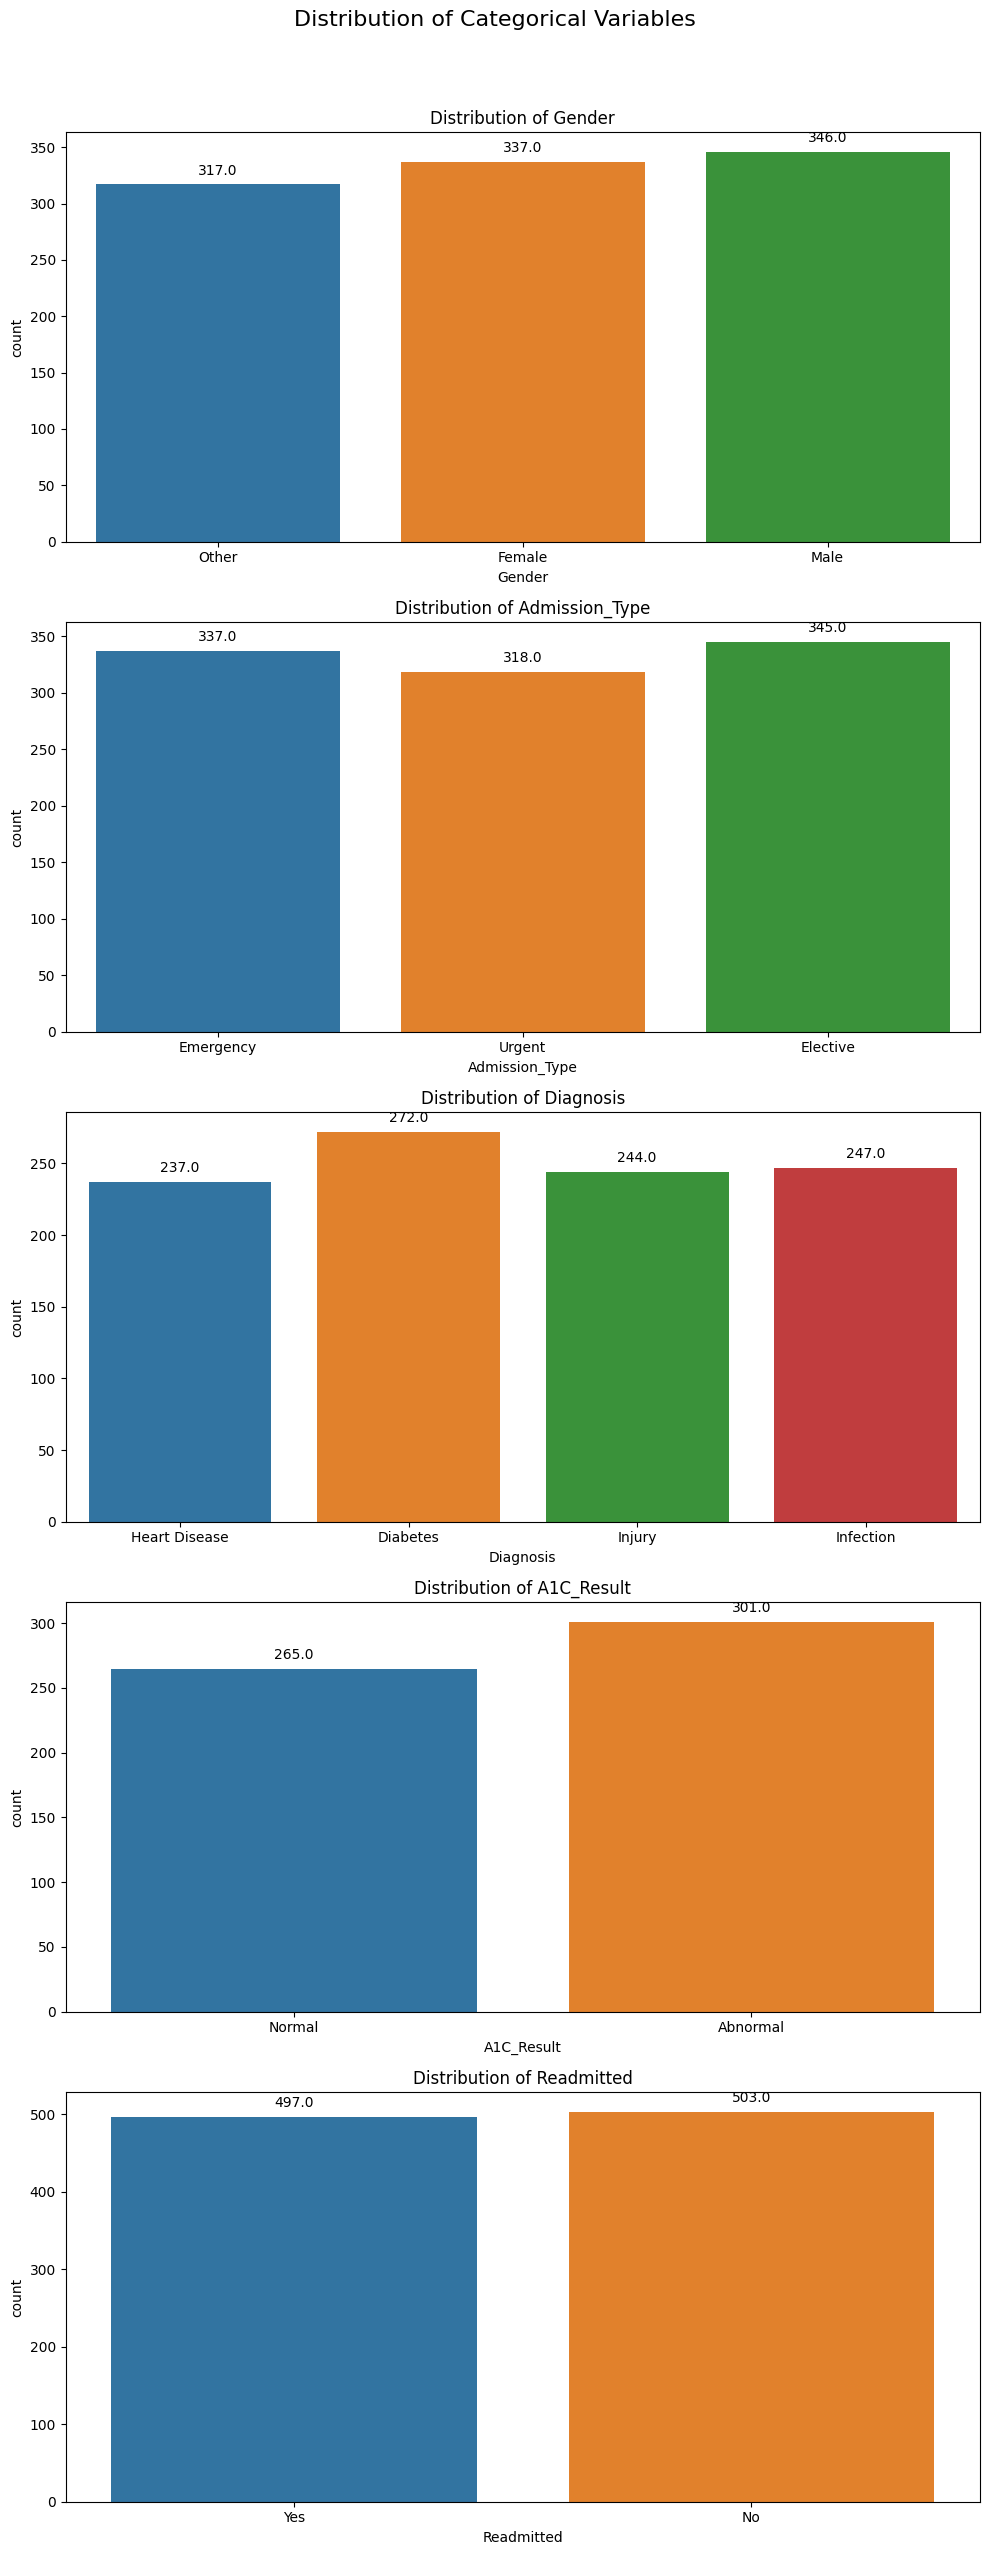

In [9]:
# Check the distribution of categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns

# Set up the subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, len(categorical_columns) * 5))

# Iterate through each categorical column and create a count plot
for i, column in enumerate(categorical_columns):
    ax = sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    
    # Add count labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                    textcoords='offset points')

# Additional formatting for better readability
plt.suptitle('Distribution of Categorical Variables', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


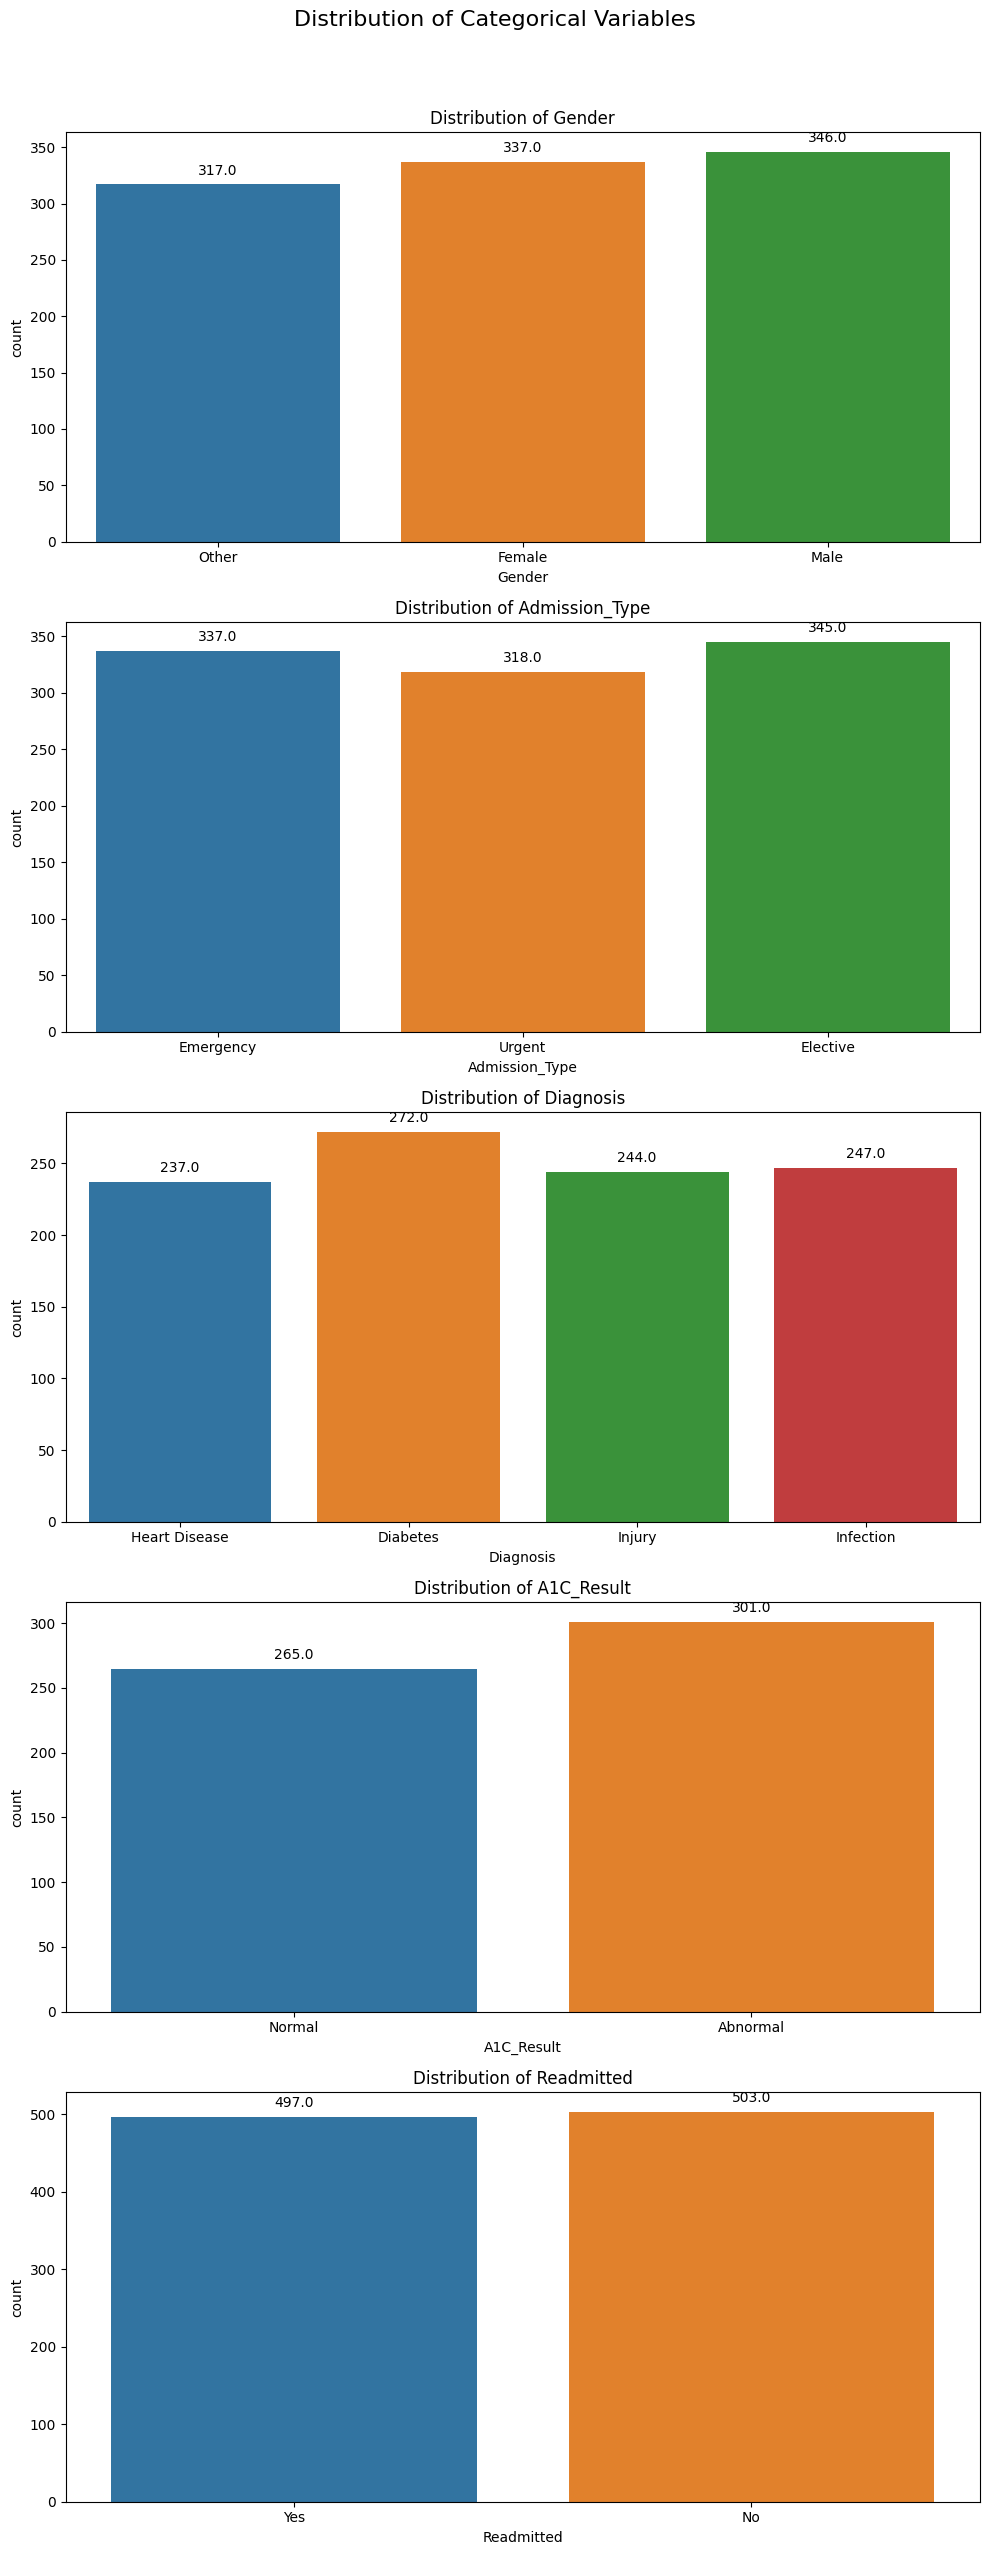

In [10]:
# Check the distribution of categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns

# Set up the subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, len(categorical_columns) * 5))

# Iterate through each categorical column and create a count plot
for i, column in enumerate(categorical_columns):
    ax = sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    
    # Add count labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                    textcoords='offset points')

# Additional formatting for better readability
plt.suptitle('Distribution of Categorical Variables', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


Visualize distributions

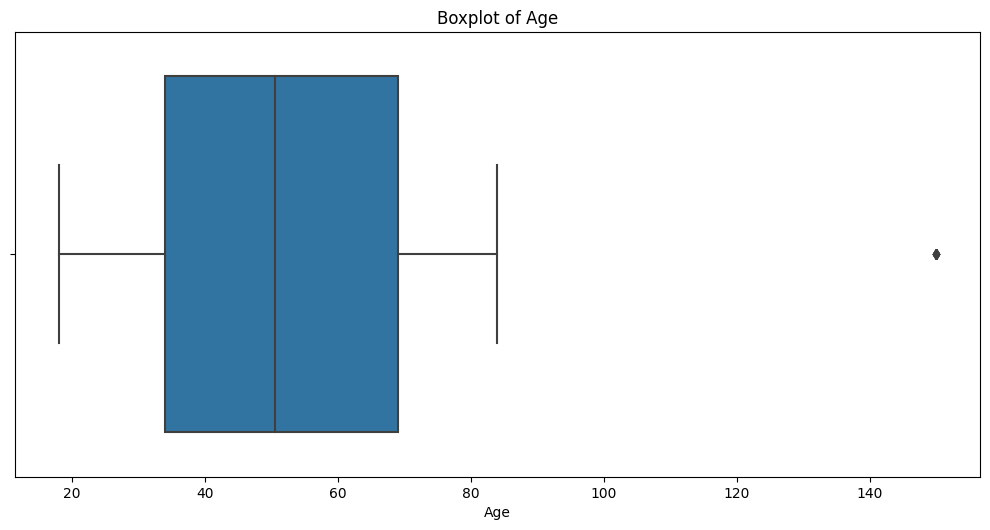

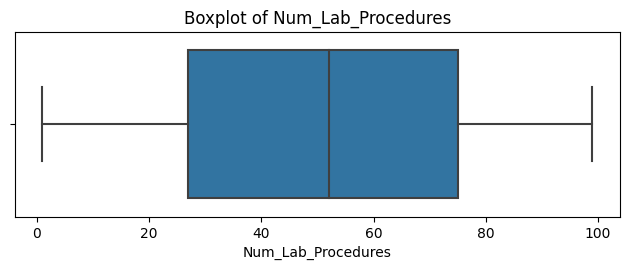

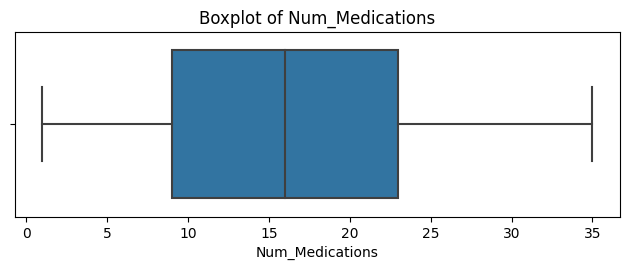

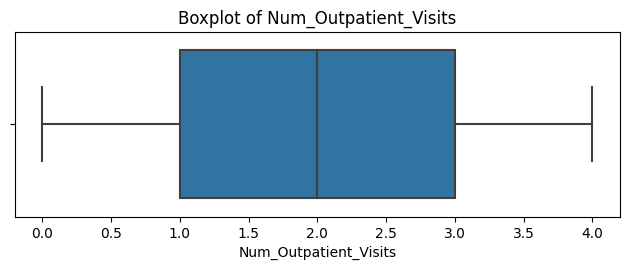

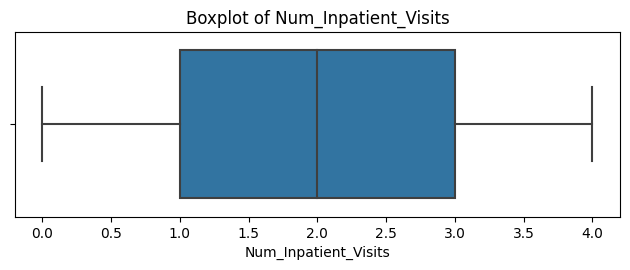

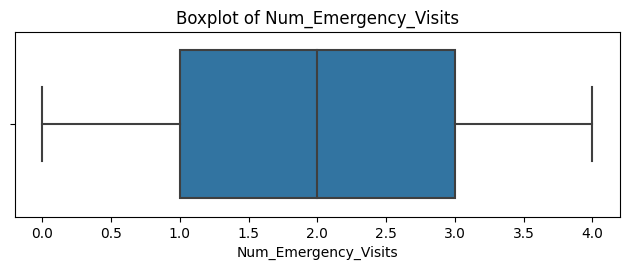

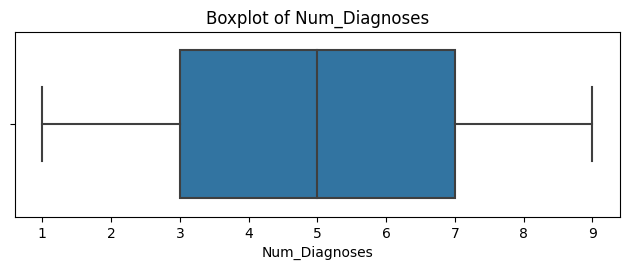

In [11]:
# Visualize Distributions for Numerical Features

# Select numerical features, excluding 'Patient_ID' as it contains unique identifiers for each patient
df_numerical = df.select_dtypes(include=['int64']).drop('Patient_ID', axis=1)

# Create box plots for each numerical feature
plt.figure(figsize=(10, 10))
for i, column in enumerate(df_numerical.columns, 1):
    plt.subplot(2, 1, 1)
    sns.boxplot(x=df_numerical[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()




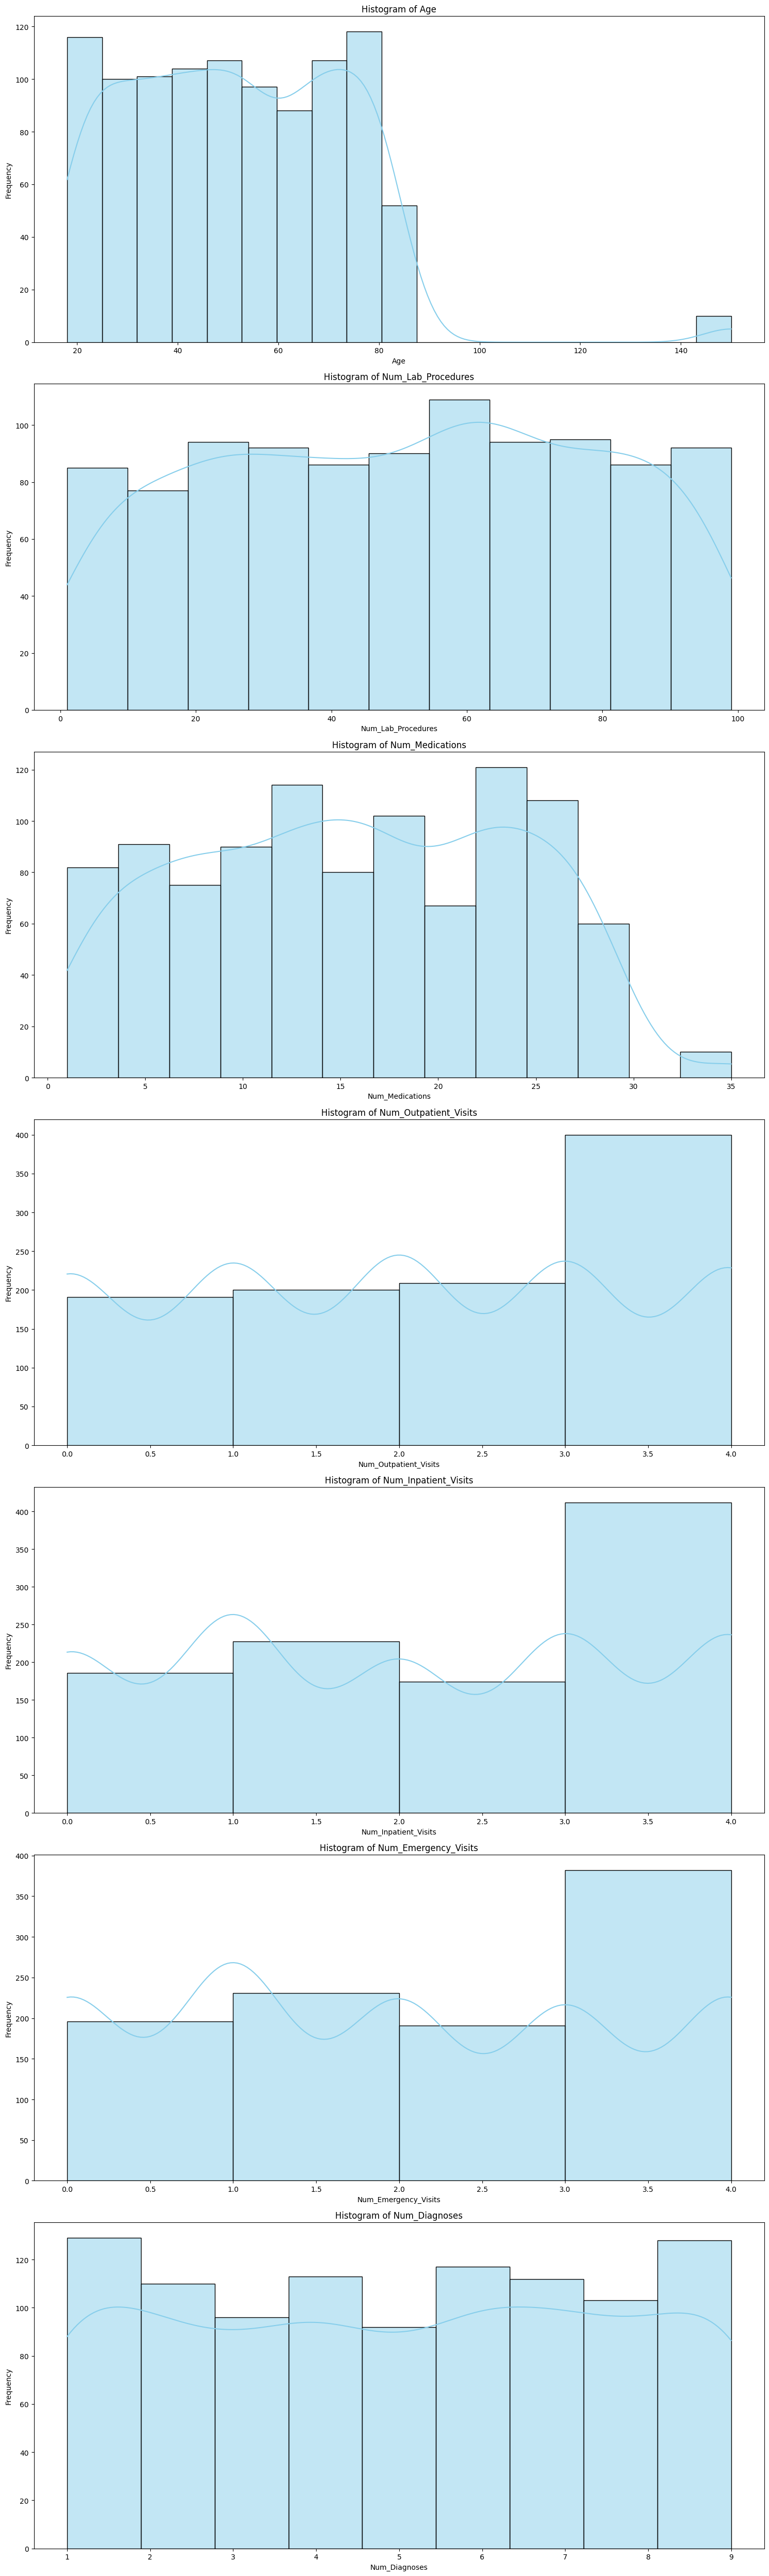

In [12]:
# Select numerical features, excluding 'Patient_ID' as it contains unique identifiers for each patient
df_numerical = df.select_dtypes(include=['int64']).drop('Patient_ID', axis=1)

# Specify custom bin widths for columns 
custom_bin_widths = {'Num_Outpatient_Visits': 4, 'Num_Inpatient_Visits': 4, 'Num_Emergency_Visits': 4, 'Num_Diagnoses': 9}

# Create histograms for each numerical feature with custom bin width
fig, axs = plt.subplots(len(df_numerical.columns), 1, figsize=(15, 50))

for i, (column, ax) in enumerate(zip(df_numerical.columns, axs)):
    # Plot histogram with custom bin width
    sns.histplot(df_numerical[column], bins=custom_bin_widths.get(column, 'auto'), kde=True, color='skyblue', edgecolor='black', ax=ax)
    
    # Set plot titles and labels
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


Numerical Features

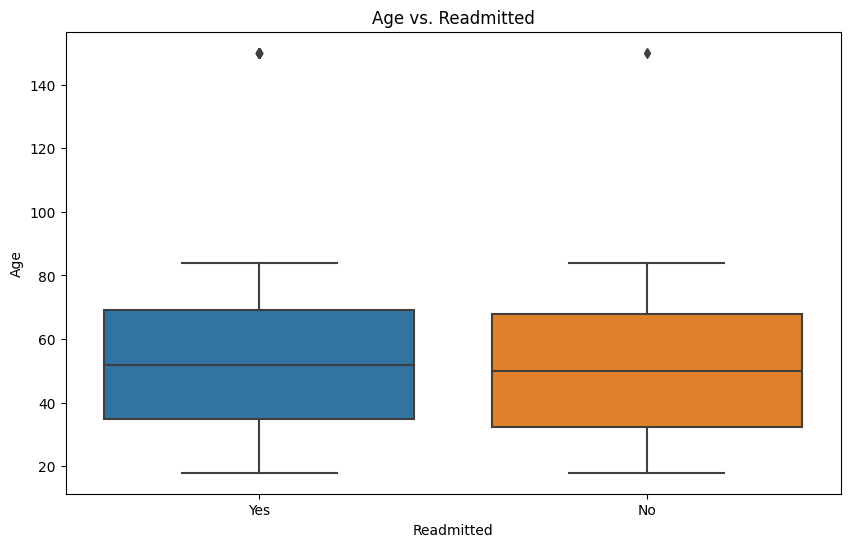

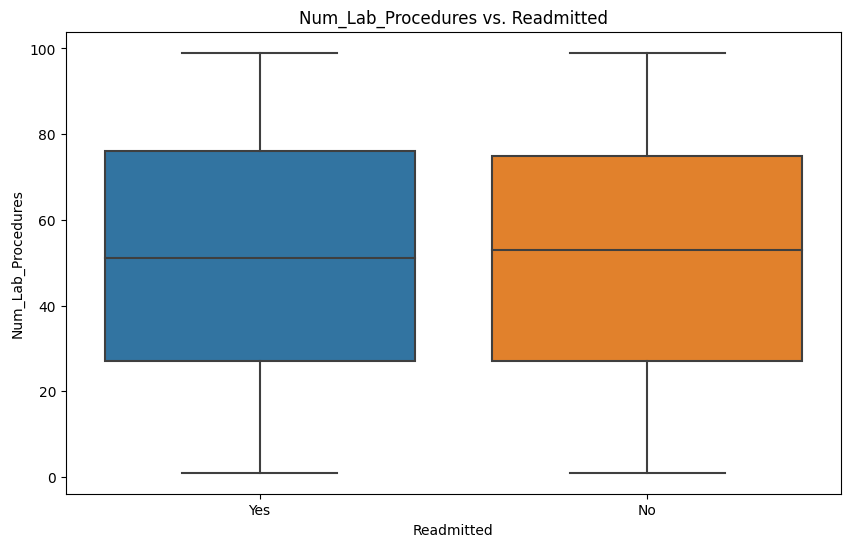

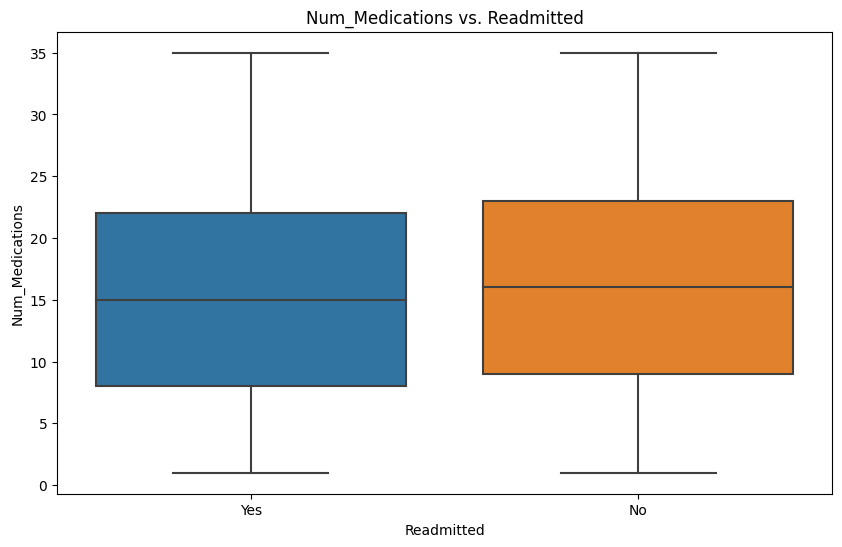

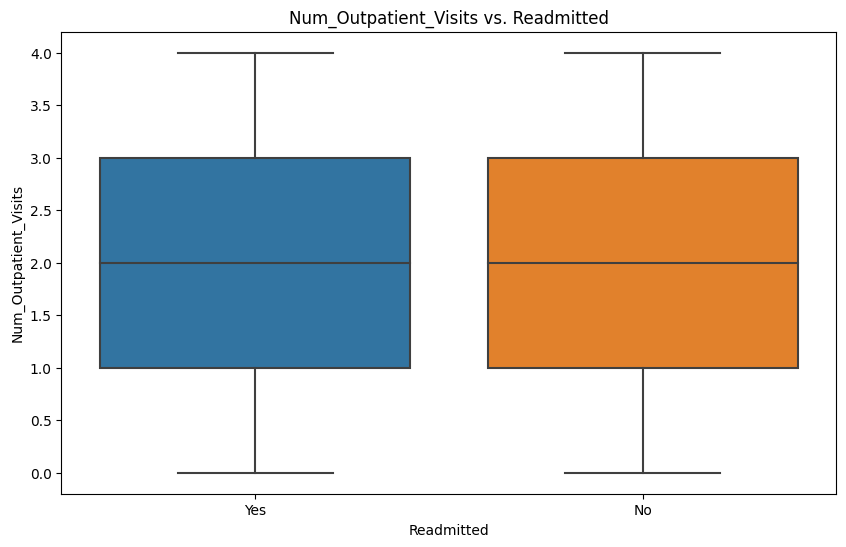

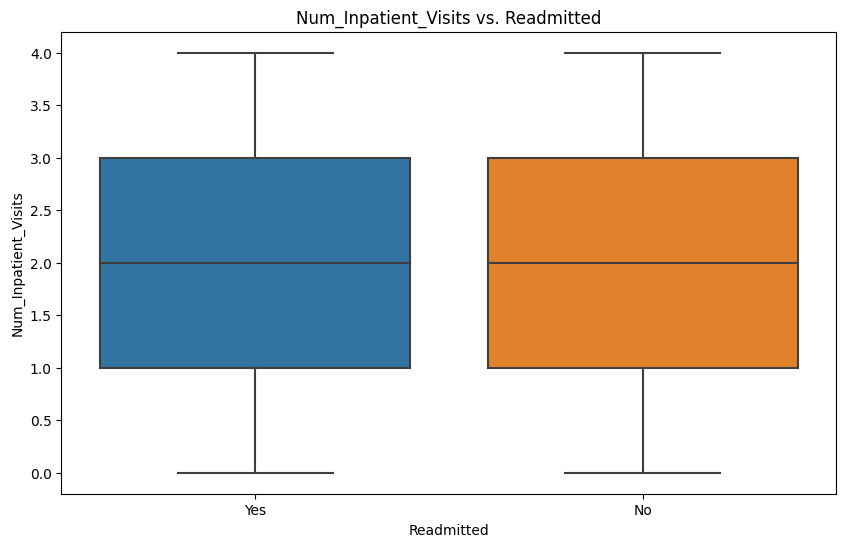

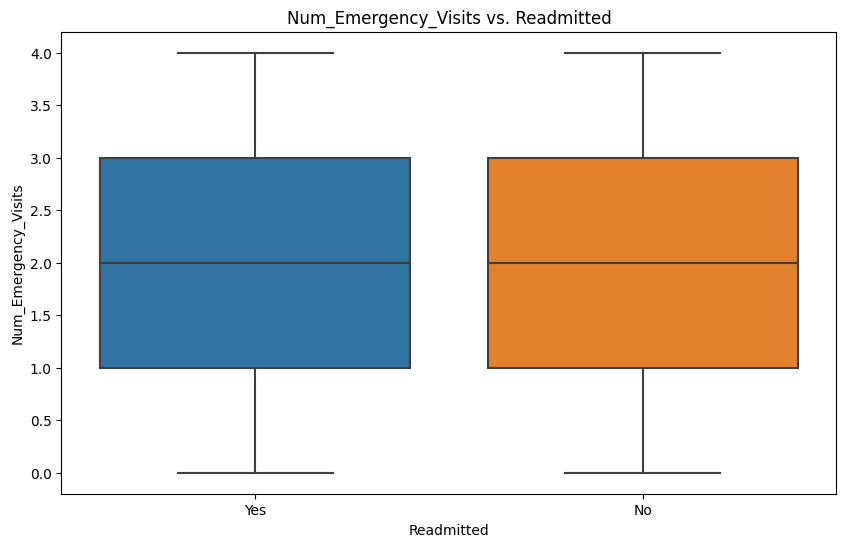

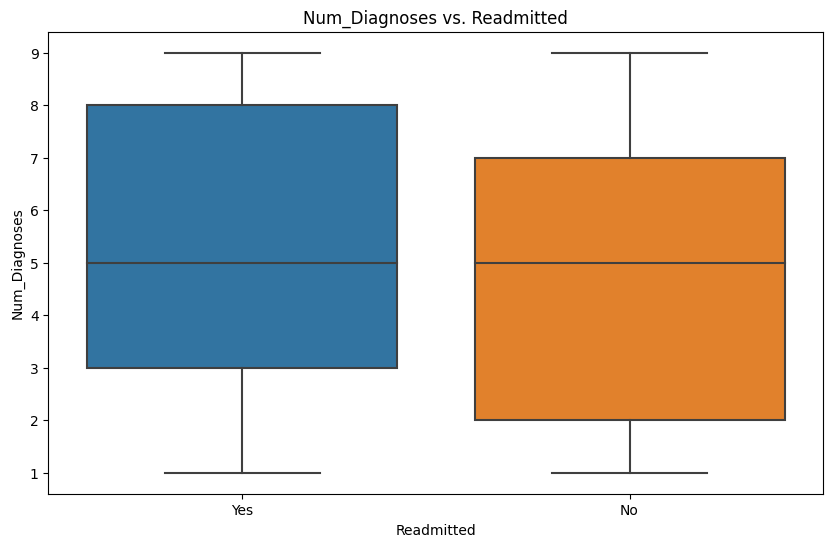

In [13]:
numerical_features = ['Age', 'Num_Lab_Procedures', 'Num_Medications', 'Num_Outpatient_Visits', 'Num_Inpatient_Visits', 'Num_Emergency_Visits', 'Num_Diagnoses']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Readmitted', y=feature, data=df)
    plt.title(f'{feature} vs. Readmitted')
    plt.show()

Categorical Features

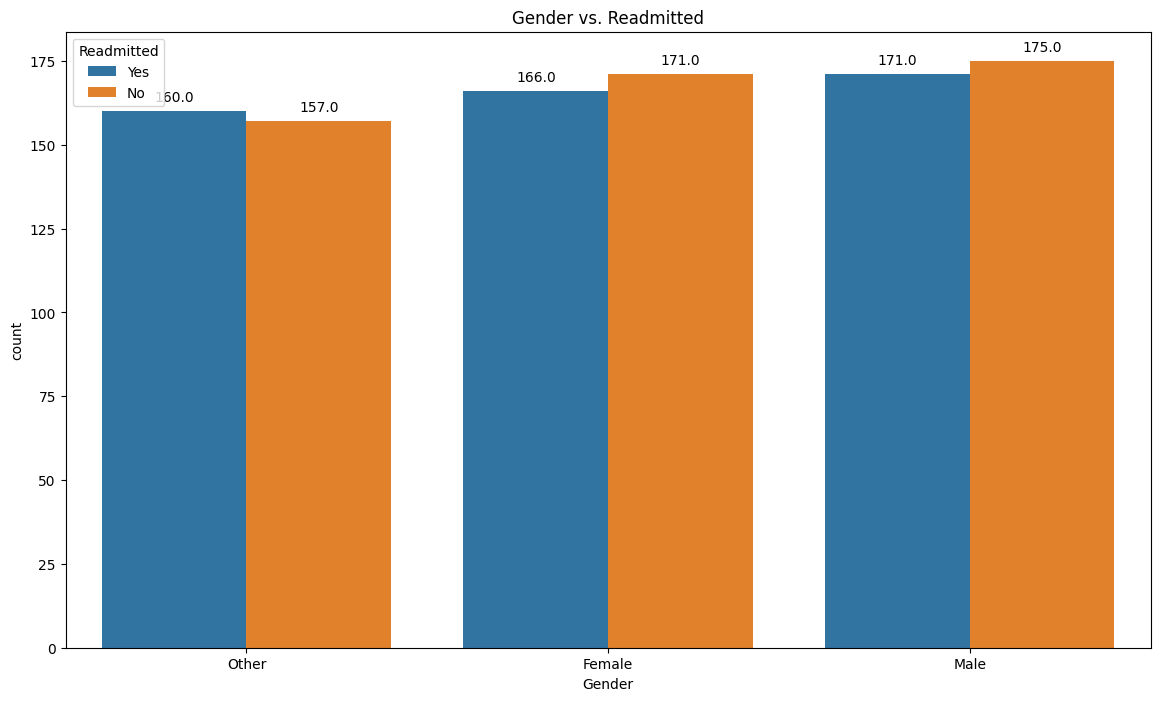

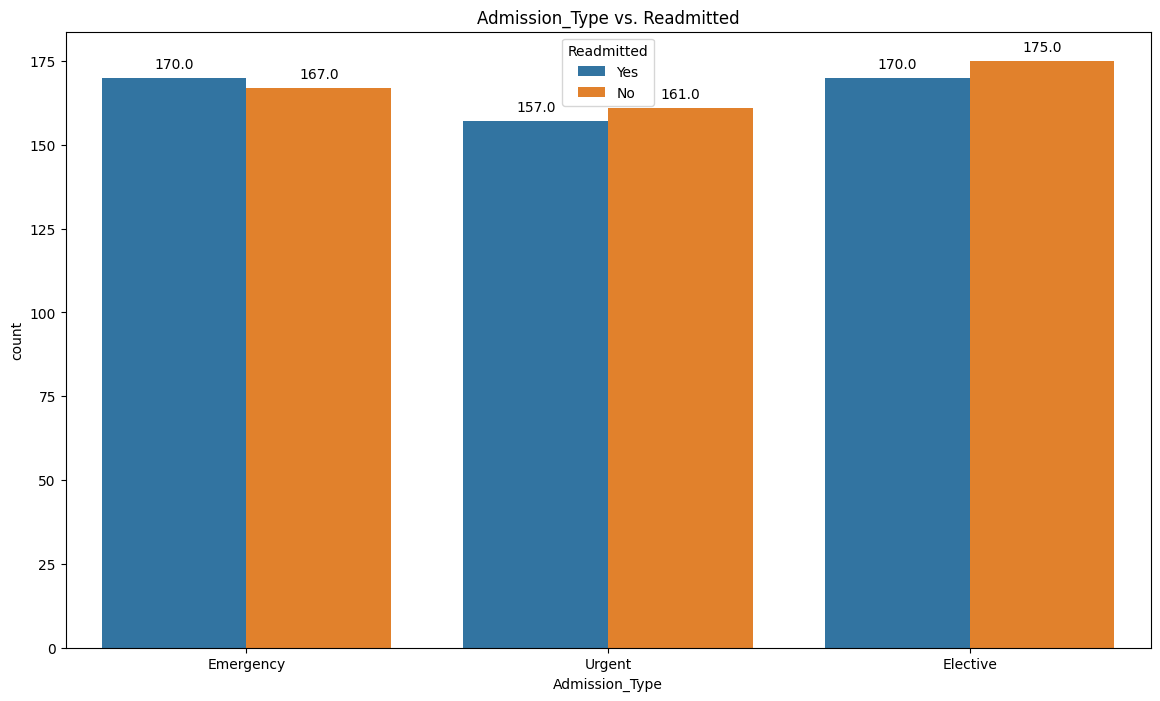

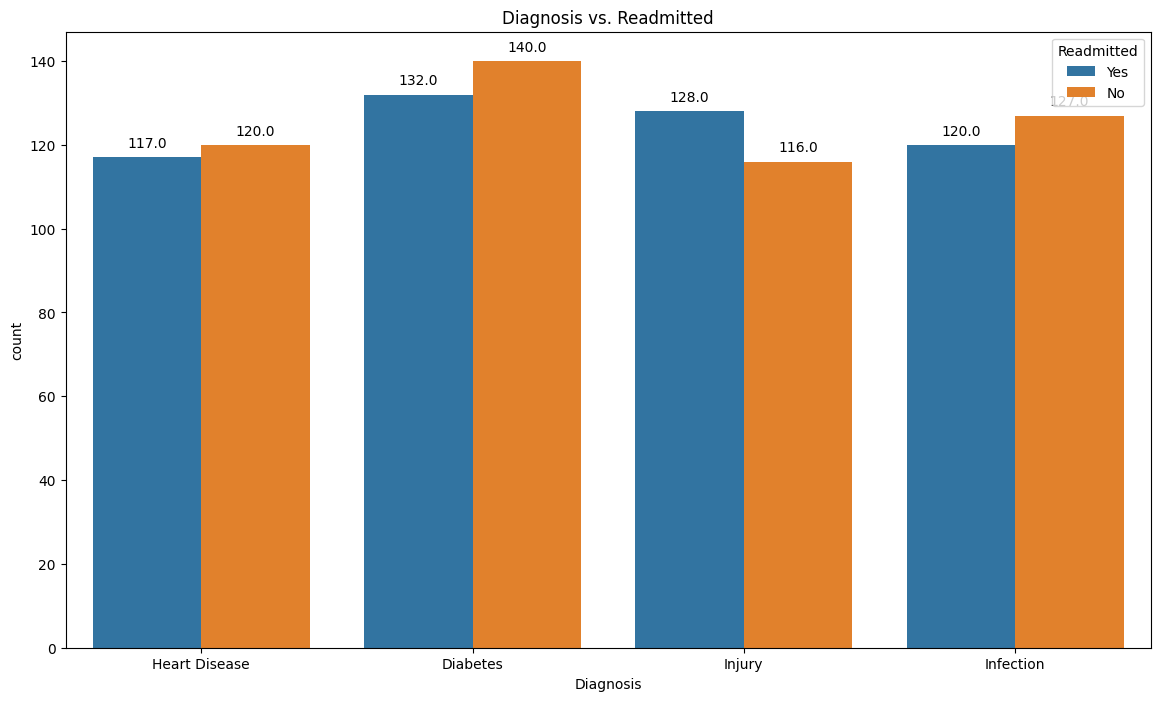

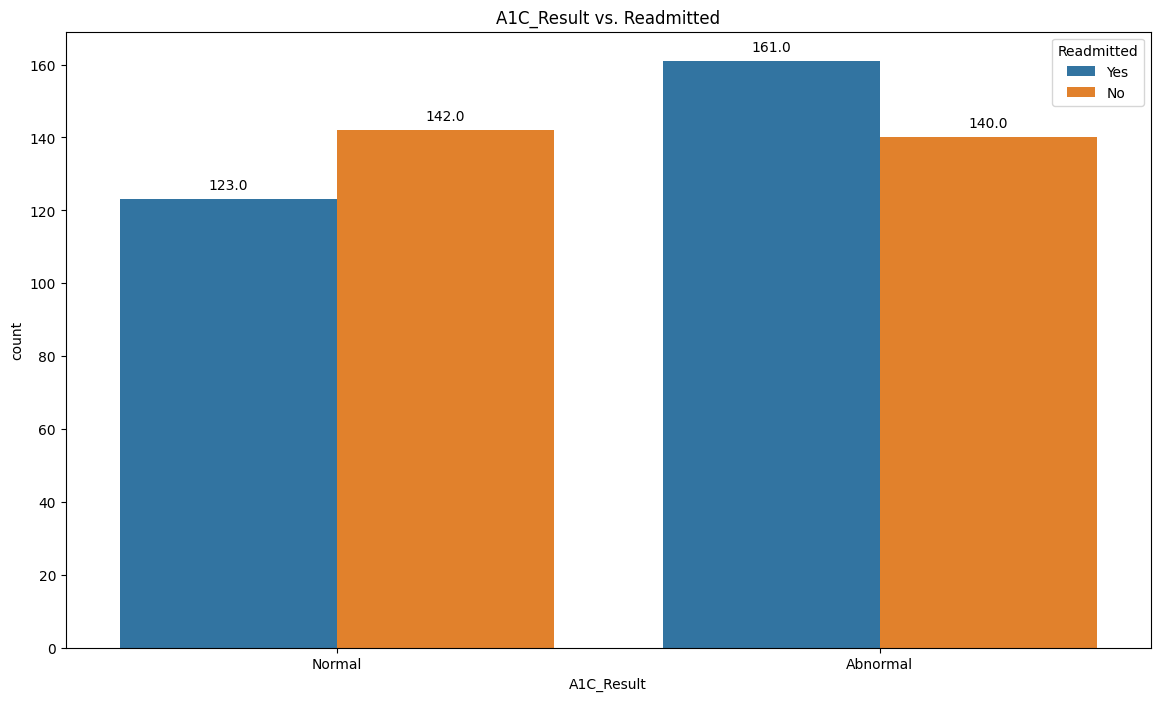

In [14]:
categorical_features = ['Gender', 'Admission_Type', 'Diagnosis', 'A1C_Result']

for feature in categorical_features:
    plt.figure(figsize=(14, 8))
    ax = sns.countplot(x=feature, hue='Readmitted', data=df)

    # Display counts on each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.title(f'{feature} vs. Readmitted')
    plt.show()


Gender vs. Readmitted:
More females have been readmitted, both in the 'yes' and 'no' categories. The difference in counts between males and females for both 'yes' and 'no' readmission is relatively small.

Admission Type vs. Readmitted:
For the 'yes' category of readmission, the counts are somewhat balanced across the three admission types. For the 'no' category, elective admission type has slightly higher counts compared to emergency and urgent.

Diagnosis vs. Readmitted:
There is variation in the counts across different diagnoses for both 'yes' and 'no' readmission. Heart disease and diabetes seem to have higher counts for both 'yes' and 'no' readmission.For injury readmission is slightly higher.

A1C Result vs. Readmitted:
Abnormal A1C results have higher counts for both 'yes' and 'no' readmission across all admission types. The counts for 'yes' readmission are generally higher than 'no' for abnormal A1C results.

In [15]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Admission_Type', 'Diagnosis',
       'Num_Lab_Procedures', 'Num_Medications', 'Num_Outpatient_Visits',
       'Num_Inpatient_Visits', 'Num_Emergency_Visits', 'Num_Diagnoses',
       'A1C_Result', 'Readmitted'],
      dtype='object')

Admission type Vs Diagnosis

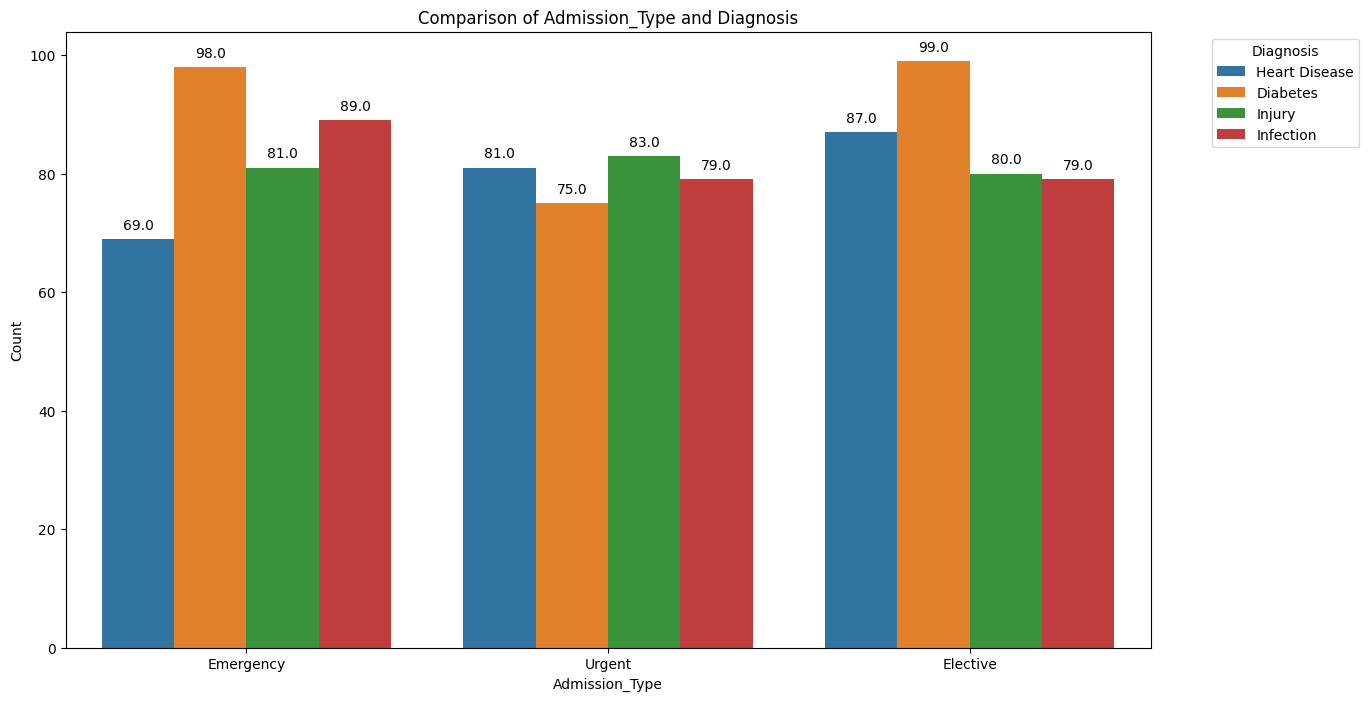

In [16]:
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='Admission_Type', hue='Diagnosis', data=df)

# Adding counts as annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Comparison of Admission_Type and Diagnosis')
plt.xlabel('Admission_Type')
plt.ylabel('Count')
plt.legend(title='Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Admission Type Vs Gender

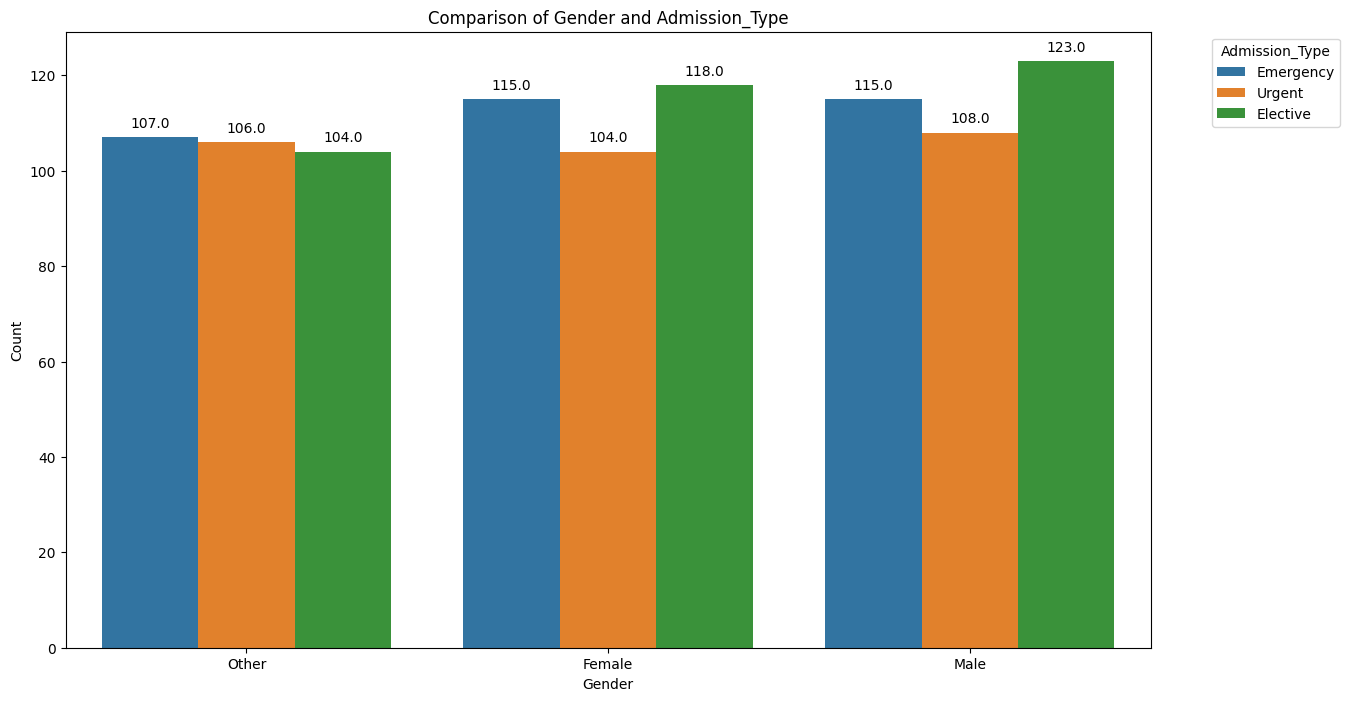

In [17]:
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='Gender', hue='Admission_Type', data=df)

# Adding counts as annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Comparison of Gender and Admission_Type')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Admission_Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

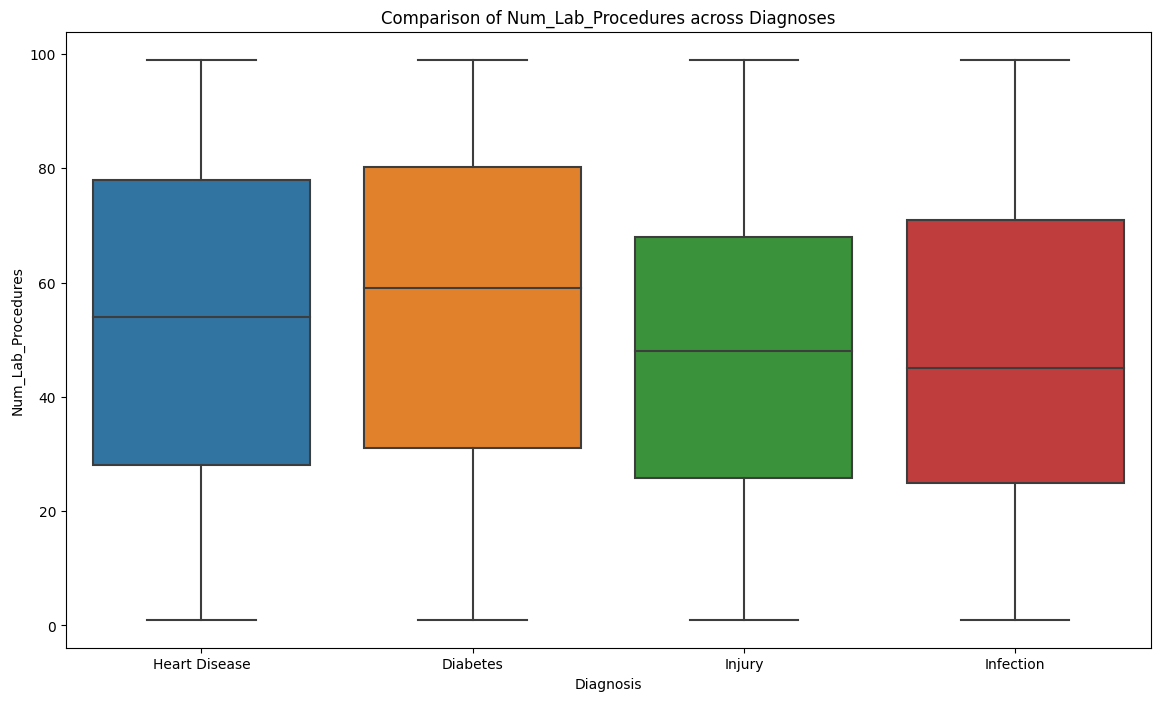

In [18]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Diagnosis', y='Num_Lab_Procedures', data=df)
plt.title('Comparison of Num_Lab_Procedures across Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('Num_Lab_Procedures')
plt.show()


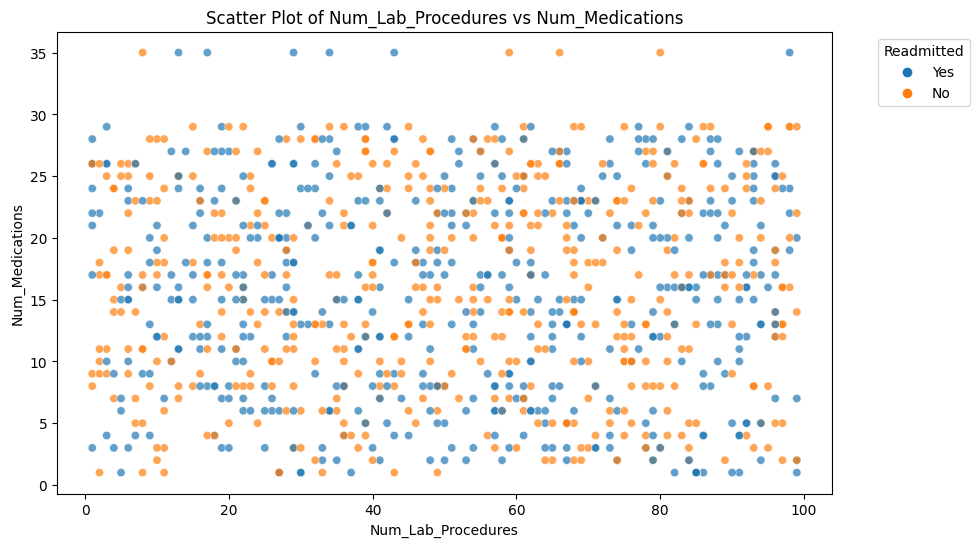

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Num_Lab_Procedures', y='Num_Medications', data=df, hue='Readmitted', alpha=0.7)
plt.title('Scatter Plot of Num_Lab_Procedures vs Num_Medications')
plt.xlabel('Num_Lab_Procedures')
plt.ylabel('Num_Medications')
plt.legend(title='Readmitted', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


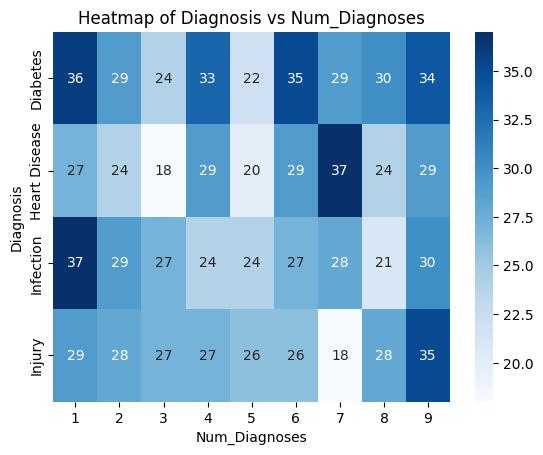

In [20]:
contingency_table = pd.crosstab(df['Diagnosis'], df['Num_Diagnoses'])
sns.heatmap(contingency_table, cmap='Blues', annot=True, fmt='d')
plt.title('Heatmap of Diagnosis vs Num_Diagnoses')
plt.xlabel('Num_Diagnoses')
plt.ylabel('Diagnosis')
plt.show()

Diabetes:
Most prevalent for Num_Diagnoses = 1 and 6. Generally consistent counts across different Num_Diagnoses.

Heart Disease:
Higher counts for Num_Diagnoses = 7. Variability in counts across different numbers of diagnoses, with a peak at 7 diagnoses.

Infection:
Relatively consistent counts across Num_Diagnoses. Slight increase for Num_Diagnoses = 1.

Injury:
Higher counts for Num_Diagnoses = 1 and 9. Variability in counts across different numbers of diagnoses.

Common Trends:
Num_Diagnoses = 3, 4, 6, and 9 exhibit common counts across all diagnoses.

Implications:
Diabetes tends to occur consistently across diagnoses. Heart Disease may be associated with a higher number of diagnoses. Injury shows varied occurrences, with peaks at 1, 6, and 9 diagnoses.

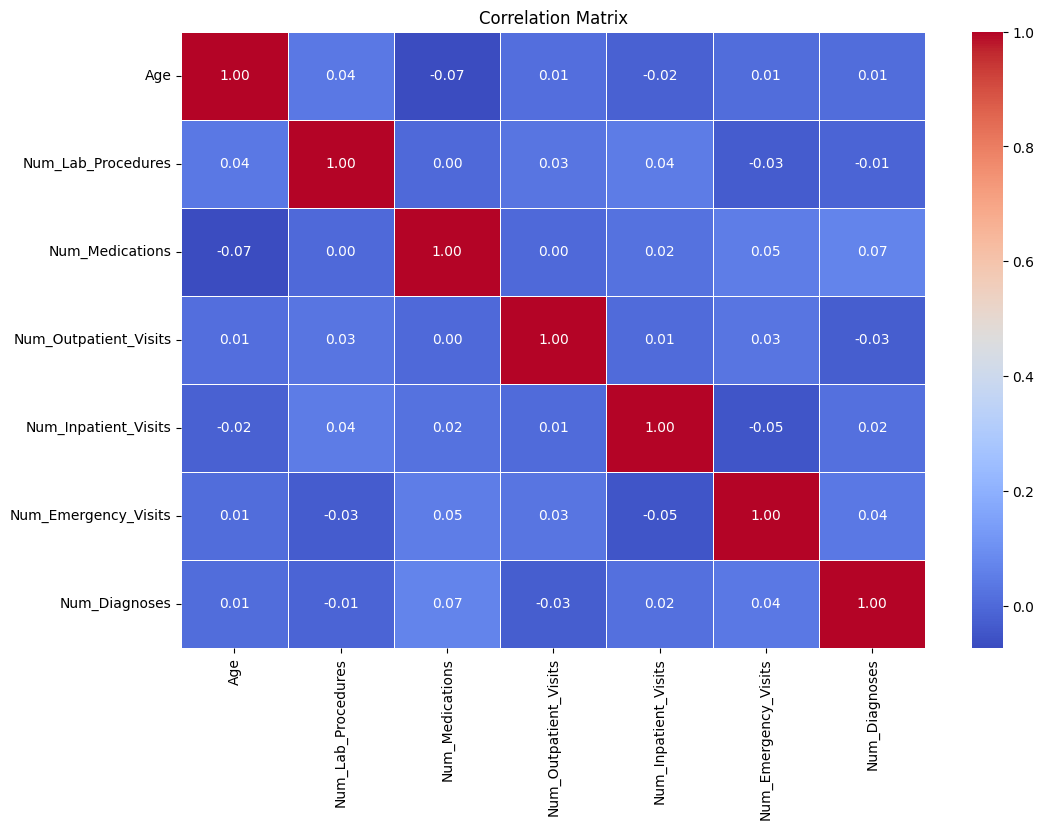

                            Age  Num_Lab_Procedures  Num_Medications  \
Age                    1.000000            0.038916        -0.073030   
Num_Lab_Procedures     0.038916            1.000000         0.000028   
Num_Medications       -0.073030            0.000028         1.000000   
Num_Outpatient_Visits  0.014190            0.031649         0.001340   
Num_Inpatient_Visits  -0.019494            0.044956         0.020988   
Num_Emergency_Visits   0.008984           -0.033713         0.050815   
Num_Diagnoses          0.008623           -0.010535         0.065452   

                       Num_Outpatient_Visits  Num_Inpatient_Visits  \
Age                                 0.014190             -0.019494   
Num_Lab_Procedures                  0.031649              0.044956   
Num_Medications                     0.001340              0.020988   
Num_Outpatient_Visits               1.000000              0.005904   
Num_Inpatient_Visits                0.005904              1.000000   
Num

In [21]:
# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Create a heatmap with correlation values
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
# Display the correlation matrix
print(correlation_matrix)

In [22]:
df.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,69,Other,Emergency,Heart Disease,33,2,4,1,1,5,NaN,Yes
1,2,32,Female,Urgent,Diabetes,81,10,4,4,1,6,NaN,No
2,3,78,Female,Urgent,Heart Disease,75,29,4,0,3,5,Normal,No
3,4,38,Male,Elective,Diabetes,77,11,2,3,4,9,NaN,Yes
4,5,41,Female,Urgent,Diabetes,50,25,3,4,1,3,NaN,Yes


In [23]:
df.tail()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
995,996,21,Female,Emergency,Heart Disease,68,10,2,3,2,9,Normal,No
996,997,43,Female,Emergency,Heart Disease,61,7,0,4,0,1,Normal,No
997,998,75,Male,Urgent,Diabetes,29,13,3,1,4,8,Normal,No
998,999,46,Other,Elective,Injury,19,20,1,4,4,1,Abnormal,No
999,1000,54,Male,Elective,Injury,43,28,2,0,4,8,Abnormal,Yes


In [24]:
df['A1C_Result'].unique()

array([nan, 'Normal', 'Abnormal'], dtype=object)

Filling null values of A1C_Result(
The A1C test reflects average blood sugar levels over a few months, offering a snapshot of diabetes management. It's expressed as a percentage, with lower values signifying better contro).

In [25]:
# Create a new category 'Not Available' for missing values in 'A1C_Result'
df['A1C_Result'] = df['A1C_Result'].fillna('Not Available')

# Verify the changes
print("Unique values in 'A1C_Result' after handling missing values:")
print(df['A1C_Result'].unique())

# Save the DataFrame to a new CSV file
df.to_csv('hospital_readmissions_filled.csv', index=False)
print("DataFrame with missing values filled saved to 'hospital_readmissions_filled.csv'")


Unique values in 'A1C_Result' after handling missing values:
['Not Available' 'Normal' 'Abnormal']
DataFrame with missing values filled saved to 'hospital_readmissions_filled.csv'


In [26]:
# Check for null values in the DataFrame
null_values = df.isnull().sum()

# Print the count of null values for each column
print("Null values count:")
print(null_values)


Null values count:
Patient_ID               0
Age                      0
Gender                   0
Admission_Type           0
Diagnosis                0
Num_Lab_Procedures       0
Num_Medications          0
Num_Outpatient_Visits    0
Num_Inpatient_Visits     0
Num_Emergency_Visits     0
Num_Diagnoses            0
A1C_Result               0
Readmitted               0
dtype: int64


In [27]:
# Calculate IQR for each numerical feature
Q1 = df_numerical.quantile(0.25)
Q3 = df_numerical.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR
outliers_iqr = ((df_numerical < (Q1 - 1.5 * IQR)) | (df_numerical > (Q3 + 1.5 * IQR)))

# Count the number of rows with outliers
num_outliers1 = outliers_iqr.sum()
# Display the outliers
print(f"Number of rows with outliers: {num_outliers1}")


Number of rows with outliers: Age                      10
Num_Lab_Procedures        0
Num_Medications           0
Num_Outpatient_Visits     0
Num_Inpatient_Visits      0
Num_Emergency_Visits      0
Num_Diagnoses             0
dtype: int64


In [28]:
# Identify rows with outliers for each feature
rows_with_outliers = df[outliers_iqr.any(axis=1)]

# Display the rows with outliers
rows_with_outliers


,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
50,51,150,Other,Urgent,Diabetes,88,10,4,3,4,5,Abnormal,Yes
51,52,150,Other,Emergency,Diabetes,86,22,1,2,3,2,Abnormal,Yes
52,53,150,Female,Urgent,Injury,93,19,0,1,3,8,Normal,Yes
53,54,150,Female,Elective,Diabetes,86,1,1,0,4,9,Normal,Yes
54,55,150,Other,Elective,Diabetes,44,7,3,3,4,4,Not Available,Yes
55,56,150,Other,Elective,Diabetes,9,4,2,4,0,6,Normal,Yes
56,57,150,Female,Emergency,Diabetes,37,1,1,2,4,8,Abnormal,Yes
57,58,150,Female,Urgent,Injury,74,15,2,0,3,9,Abnormal,Yes
58,59,150,Male,Emergency,Diabetes,36,8,0,4,4,5,Normal,No
59,60,150,Male,Urgent,Infection,92,12,4,4,0,6,Abnormal,Yes



The data shows some unusual values in the "Age" column, where all entries are listed as 150 years old. This seems improbable and could suggest errors or mistakes in recording. To ensure data accuracy, it is recommended to remove these rows from the dataset.

In [29]:
# Drop rows with outliers
df_cleaned_iqr = df[~outliers_iqr.any(axis=1)]

# Display the cleaned DataFrame
print("DataFrame after dropping rows with outliers:")
print(df_cleaned_iqr.shape)

DataFrame after dropping rows with outliers:
(990, 13)


Feature processing

In [30]:
df_cleaned_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient_ID             990 non-null    int64 
 1   Age                    990 non-null    int64 
 2   Gender                 990 non-null    object
 3   Admission_Type         990 non-null    object
 4   Diagnosis              990 non-null    object
 5   Num_Lab_Procedures     990 non-null    int64 
 6   Num_Medications        990 non-null    int64 
 7   Num_Outpatient_Visits  990 non-null    int64 
 8   Num_Inpatient_Visits   990 non-null    int64 
 9   Num_Emergency_Visits   990 non-null    int64 
 10  Num_Diagnoses          990 non-null    int64 
 11  A1C_Result             990 non-null    object
 12  Readmitted             990 non-null    object
dtypes: int64(8), object(5)
memory usage: 108.3+ KB


In [31]:
df_cleaned_iqr.describe()

,Patient_ID,Age,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,504.994949,50.671717,50.697980,15.719192,2.018182,2.016162,1.946465,4.998990
std,286.770863,19.739924,28.035343,8.222631,1.399723,1.415550,1.405666,2.665929
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,258.250000,34.000000,27.000000,9.000000,1.000000,1.000000,1.000000,3.000000
50%,505.500000,50.000000,52.000000,16.000000,2.000000,2.000000,2.000000,5.000000
75%,752.750000,68.000000,74.000000,23.000000,3.000000,3.000000,3.000000,7.000000
max,1000.000000,84.000000,99.000000,35.000000,4.000000,4.000000,4.000000,9.000000


In [32]:
# Print unique values for each categorical column
print("Unique values in 'Gender':", df_cleaned_iqr['Gender'].unique())
print("\nUnique values in 'Admission_Type':", df_cleaned_iqr['Admission_Type'].unique())
print("\nUnique values in 'Diagnosis':", df_cleaned_iqr['Diagnosis'].unique())
print("\nUnique values in 'A1C_Result':", df_cleaned_iqr['A1C_Result'].unique())


Unique values in 'Gender': ['Other' 'Female' 'Male']

Unique values in 'Admission_Type': ['Emergency' 'Urgent' 'Elective']

Unique values in 'Diagnosis': ['Heart Disease' 'Diabetes' 'Injury' 'Infection']

Unique values in 'A1C_Result': ['Not Available' 'Normal' 'Abnormal']


In [33]:
df_cleaned_iqr.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,69,Other,Emergency,Heart Disease,33,2,4,1,1,5,Not Available,Yes
1,2,32,Female,Urgent,Diabetes,81,10,4,4,1,6,Not Available,No
2,3,78,Female,Urgent,Heart Disease,75,29,4,0,3,5,Normal,No
3,4,38,Male,Elective,Diabetes,77,11,2,3,4,9,Not Available,Yes
4,5,41,Female,Urgent,Diabetes,50,25,3,4,1,3,Not Available,Yes


In [34]:
df_cleaned_iqr.tail()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
995,996,21,Female,Emergency,Heart Disease,68,10,2,3,2,9,Normal,No
996,997,43,Female,Emergency,Heart Disease,61,7,0,4,0,1,Normal,No
997,998,75,Male,Urgent,Diabetes,29,13,3,1,4,8,Normal,No
998,999,46,Other,Elective,Injury,19,20,1,4,4,1,Abnormal,No
999,1000,54,Male,Elective,Injury,43,28,2,0,4,8,Abnormal,Yes


In [35]:
df_cleaned_iqr['Age'].describe()

count    990.000000
mean      50.671717
std       19.739924
min       18.000000
25%       34.000000
50%       50.000000
75%       68.000000
max       84.000000
Name: Age, dtype: float64

In [36]:
# Create a new column 'Total_Visits' by summing the specified columns using .loc
df_cleaned_iqr.loc[:, 'Total_Visits'] = df_cleaned_iqr['Num_Outpatient_Visits'] + df_cleaned_iqr['Num_Inpatient_Visits'] + df_cleaned_iqr['Num_Emergency_Visits']


C:\Users\rajus\AppData\Local\Temp\ipykernel_15896\2079518271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_iqr.loc[:, 'Total_Visits'] = df_cleaned_iqr['Num_Outpatient_Visits'] + df_cleaned_iqr['Num_Inpatient_Visits'] + df_cleaned_iqr['Num_Emergency_Visits']


In [37]:
# Set the polypharmacy threshold
threshold = 5

# Create the 'Polypharmacy' feature using .loc
df_cleaned_iqr = df_cleaned_iqr.copy()
df_cleaned_iqr['Polypharmacy'] = (df_cleaned_iqr['Num_Medications'] > threshold).astype(int)


In [38]:
df_cleaned_iqr.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted,Total_Visits,Polypharmacy
0,1,69,Other,Emergency,Heart Disease,33,2,4,1,1,5,Not Available,Yes,6,0
1,2,32,Female,Urgent,Diabetes,81,10,4,4,1,6,Not Available,No,9,1
2,3,78,Female,Urgent,Heart Disease,75,29,4,0,3,5,Normal,No,7,1
3,4,38,Male,Elective,Diabetes,77,11,2,3,4,9,Not Available,Yes,9,1
4,5,41,Female,Urgent,Diabetes,50,25,3,4,1,3,Not Available,Yes,8,1


In [39]:
df_cleaned_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient_ID             990 non-null    int64 
 1   Age                    990 non-null    int64 
 2   Gender                 990 non-null    object
 3   Admission_Type         990 non-null    object
 4   Diagnosis              990 non-null    object
 5   Num_Lab_Procedures     990 non-null    int64 
 6   Num_Medications        990 non-null    int64 
 7   Num_Outpatient_Visits  990 non-null    int64 
 8   Num_Inpatient_Visits   990 non-null    int64 
 9   Num_Emergency_Visits   990 non-null    int64 
 10  Num_Diagnoses          990 non-null    int64 
 11  A1C_Result             990 non-null    object
 12  Readmitted             990 non-null    object
 13  Total_Visits           990 non-null    int64 
 14  Polypharmacy           990 non-null    int32 
dtypes: int32(1), int64(9), objec

In [40]:
# Print unique values for each specified column
print("Unique values in 'Gender':", df_cleaned_iqr["Gender"].unique())
print("\nUnique values in 'Admission_Type':", df_cleaned_iqr["Admission_Type"].unique())
print("\nUnique values in 'Diagnosis':", df_cleaned_iqr["Diagnosis"].unique())
print("\nUnique values in 'A1C_Result':", df_cleaned_iqr["A1C_Result"].unique())
print("\nUnique values in 'Readmitted':", df_cleaned_iqr["Readmitted"].unique())


Unique values in 'Gender': ['Other' 'Female' 'Male']

Unique values in 'Admission_Type': ['Emergency' 'Urgent' 'Elective']

Unique values in 'Diagnosis': ['Heart Disease' 'Diabetes' 'Injury' 'Infection']

Unique values in 'A1C_Result': ['Not Available' 'Normal' 'Abnormal']

Unique values in 'Readmitted': ['Yes' 'No']



Data Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame
df_encoded = df_cleaned_iqr.copy()

# Initialize the LabelEncoder for binary encoding
label_encoder = LabelEncoder()

# Apply label encoding to the "Readmitted" column
df_encoded['Readmitted'] = label_encoder.fit_transform(df_cleaned_iqr['Readmitted'])
df_encoded['Diagnosis'] = label_encoder.fit_transform(df_cleaned_iqr['Diagnosis'])
df_encoded['A1C_Result'] = label_encoder.fit_transform(df_cleaned_iqr['A1C_Result'])
df_encoded['Admission_Type'] = label_encoder.fit_transform(df_cleaned_iqr['Admission_Type'])
df_encoded['Gender'] = label_encoder.fit_transform(df_cleaned_iqr['Gender'])



In [42]:
df_encoded

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted,Total_Visits,Polypharmacy
0,1,69,2,1,1,33,2,4,1,1,5,2,1,6,0
1,2,32,0,2,0,81,10,4,4,1,6,2,0,9,1
2,3,78,0,2,1,75,29,4,0,3,5,1,0,7,1
3,4,38,1,0,0,77,11,2,3,4,9,2,1,9,1
4,5,41,0,2,0,50,25,3,4,1,3,2,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,21,0,1,1,68,10,2,3,2,9,1,0,7,1
996,997,43,0,1,1,61,7,0,4,0,1,1,0,4,1
997,998,75,1,2,0,29,13,3,1,4,8,1,0,8,1
998,999,46,2,0,3,19,20,1,4,4,1,0,0,9,1


In [43]:

df_encoded.to_csv('hospital_readmissions_encoded.csv', index=False)
print("DataFrame with label encoding saved to 'hospital_readmissions_encoded.csv'")

DataFrame with label encoding saved to 'hospital_readmissions_encoded.csv'


Correlation Analysis

Correlation Matrix for Encoded DataFrame:
                       Patient_ID       Age    Gender  Admission_Type  \
Patient_ID               1.000000 -0.016565 -0.012351        0.054516   
Age                     -0.016565  1.000000  0.037052        0.048886   
Gender                  -0.012351  0.037052  1.000000        0.026806   
Admission_Type           0.054516  0.048886  0.026806        1.000000   
Diagnosis                0.018633 -0.039578 -0.006214        0.039779   
Num_Lab_Procedures      -0.017374  0.019054 -0.033883        0.047835   
Num_Medications         -0.056455 -0.046604  0.011169       -0.058144   
Num_Outpatient_Visits   -0.086263  0.023820 -0.012192        0.026189   
Num_Inpatient_Visits     0.037420 -0.032051 -0.018280       -0.042604   
Num_Emergency_Visits     0.011252 -0.024028 -0.026772       -0.011930   
Num_Diagnoses            0.019233 -0.012995  0.025340       -0.022846   
A1C_Result              -0.063415 -0.104403  0.007042        0.018876   
Readmitte

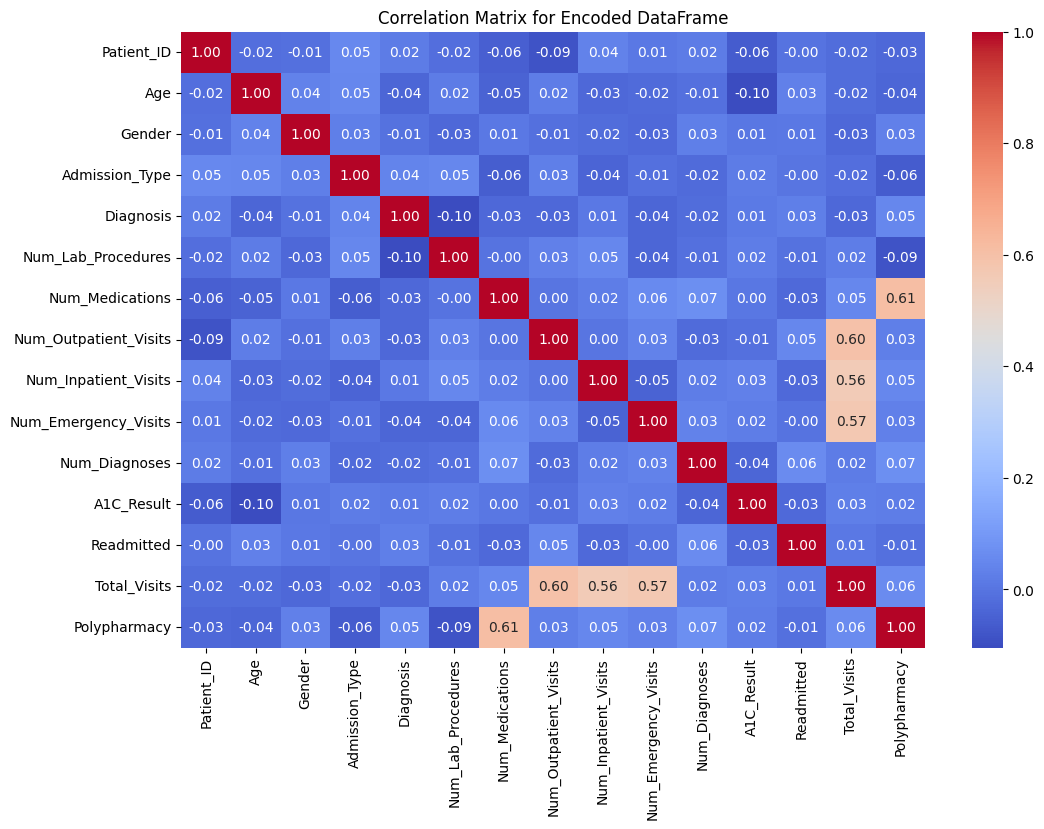

In [44]:
# Calculate the correlation matrix for encoded dataframe
correlation_matrix_encoded = df_encoded.corr()

# Display the correlation matrix
print("Correlation Matrix for Encoded DataFrame:")
print(correlation_matrix_encoded)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Encoded DataFrame")
plt.show()


Highly Correlated Features:
The number of outpatient visits and total visits are strongly correlated at 0.60.
There is a significant correlation of 0.56 between the number of inpatient visits and total visits.
The number of medications and polypharmacy exhibit a strong correlation of 0.61.


Moderately Correlated Features:
The number of medications and the number of diagnoses show a moderate correlation of 0.07.
Surprisingly, the number of outpatient visits and the number of diagnoses have a slight negative correlation of -0.03.
The number of inpatient visits and the number of diagnoses are moderately correlated at 0.02.

Top Features for Machine Learning Classification:
The number of diagnoses is the most influential feature with a weight of 0.06.
Diagnosis itself also holds importance in classification with a weight of 0.03.

            
Features to Omit:
Number of outpatient visits
Patient ID
Number of medications

The excluded columns are'Patient_ID',''Num_Outpatient_Visits','Num_Medications'

In [45]:

# List of columns to exclude
exclude_columns = ['Patient_ID','Num_Outpatient_Visits','Num_Medications']

# Create a new DataFrame for ML by excluding specified columns
df_ml = df_encoded.drop(columns=exclude_columns)

# Display the first few rows of the new DataFrame
df_ml.head()

,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted,Total_Visits,Polypharmacy
0,69,2,1,1,33,1,1,5,2,1,6,0
1,32,0,2,0,81,4,1,6,2,0,9,1
2,78,0,2,1,75,0,3,5,1,0,7,1
3,38,1,0,0,77,3,4,9,2,1,9,1
4,41,0,2,0,50,4,1,3,2,1,8,1


In [46]:
df_ml.describe()

,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted,Total_Visits,Polypharmacy
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,50.671717,0.979798,0.971717,1.469697,50.697980,2.016162,1.946465,4.998990,1.138384,0.492929,5.980808,0.862626
std,19.739924,0.807946,0.813938,1.128987,28.035343,1.415550,1.405666,2.665929,0.847313,0.500203,2.430143,0.344415
min,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,0.000000,0.000000,0.000000,27.000000,1.000000,1.000000,3.000000,0.000000,0.000000,4.000000,1.000000
50%,50.000000,1.000000,1.000000,1.000000,52.000000,2.000000,2.000000,5.000000,1.000000,0.000000,6.000000,1.000000
75%,68.000000,2.000000,2.000000,2.000000,74.000000,3.000000,3.000000,7.000000,2.000000,1.000000,8.000000,1.000000
max,84.000000,2.000000,2.000000,3.000000,99.000000,4.000000,4.000000,9.000000,2.000000,1.000000,12.000000,1.000000


In [47]:
from sklearn.preprocessing import StandardScaler


features_to_scale = ['Age', 'Num_Lab_Procedures','Num_Emergency_Visits','Num_Inpatient_Visits',
                      'Total_Visits','Num_Diagnoses']

# Standardization
scaler_standard = StandardScaler()
df_standardized = df_ml.copy()
df_standardized[features_to_scale] = scaler_standard.fit_transform(df_ml[features_to_scale])


In [48]:
# Display the first few rows of the standardized DataFrames
print("Standardized DataFrame:")
df_standardized.head()

Standardized DataFrame:


,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted,Total_Visits,Polypharmacy
0,0.928957,2,1,1,-0.631593,-0.718219,-0.673661,0.000379,2,1,0.007901,0
1,-0.946364,0,2,0,1.081397,1.402169,-0.673661,0.375672,2,0,1.243020,1
2,1.385117,0,2,1,0.867273,-1.425015,0.749871,0.000379,1,0,0.419608,1
3,-0.642258,1,0,0,0.938648,0.695373,1.461637,1.501552,2,1,1.243020,1
4,-0.490205,0,2,0,-0.024909,1.402169,-0.673661,-0.750208,2,1,0.831314,1


Model building (Testing different models, and the one with the best accuracy will be chosen in the end.)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

In [50]:
# Split the Data into Training and Testing Sets
X_std = df_standardized.drop('Readmitted', axis=1)
y_std = df_standardized['Readmitted']

X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y_std, test_size=0.2, random_state=42)

In [51]:
X_train_std.head(2)

,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Total_Visits,Polypharmacy
763,0.016639,2,0,3,-1.273964,-1.425015,0.749871,1.126259,1,-0.815511,1
225,-1.351839,1,0,0,-0.702968,0.695373,-0.673661,0.750966,2,0.007901,1


In [52]:
y_train_std.head(5)

763    0
225    0
304    0
49     0
730    0
Name: Readmitted, dtype: int32

Logistic Regression Classification model

In [53]:
# Logistic Regression (Standardized Dataset)
logistic_model_std = LogisticRegression(random_state=42)
logistic_model_std.fit(X_train_std, y_train_std)

# Training Evaluation
y_logistic_train_pred_std = logistic_model_std.predict(X_train_std)
accuracy_logistic_train_std = accuracy_score(y_train_std, y_logistic_train_pred_std)
precision_logistic_train_std = precision_score(y_train_std, y_logistic_train_pred_std)
recall_logistic_train_std = recall_score(y_train_std, y_logistic_train_pred_std)
f1_logistic_train_std = f1_score(y_train_std, y_logistic_train_pred_std)
fpr_logistic_train_std, tpr_logistic_train_std, thresholds_logistic_train_std = roc_curve(y_train_std, logistic_model_std.predict_proba(X_train_std)[:, 1])
roc_auc_logistic_train_std = auc(fpr_logistic_train_std, tpr_logistic_train_std)

# Testing Evaluation
y_logistic_pred_proba_std = logistic_model_std.predict_proba(X_test_std)[:, 1]
y_logistic_pred_std = logistic_model_std.predict(X_test_std)
accuracy_logistic_std = accuracy_score(y_test_std, y_logistic_pred_std)
precision_logistic_std = precision_score(y_test_std, y_logistic_pred_std)
recall_logistic_std = recall_score(y_test_std, y_logistic_pred_std)
f1_logistic_std = f1_score(y_test_std, y_logistic_pred_std)
fpr_logistic_std, tpr_logistic_std, thresholds_logistic_std = roc_curve(y_test_std, y_logistic_pred_proba_std)
roc_auc_logistic_std = auc(fpr_logistic_std, tpr_logistic_std)



Decision Trees Classification model

In [54]:
# Decision Trees Classification model for df_standardized dataset
# Decision Trees for Standardized Dataset
tree_model_std = DecisionTreeClassifier(random_state=42)
tree_model_std.fit(X_train_std, y_train_std)

# Training Evaluation
y_tree_train_pred_std = tree_model_std.predict(X_train_std)
accuracy_tree_train_std = accuracy_score(y_train_std, y_tree_train_pred_std)
precision_tree_train_std = precision_score(y_train_std, y_tree_train_pred_std)
recall_tree_train_std = recall_score(y_train_std, y_tree_train_pred_std)
f1_tree_train_std = f1_score(y_train_std, y_tree_train_pred_std)
fpr_tree_train_std, tpr_tree_train_std, thresholds_tree_train_std = roc_curve(y_train_std, tree_model_std.predict_proba(X_train_std)[:, 1])
roc_auc_tree_train_std = auc(fpr_tree_train_std, tpr_tree_train_std)

# Testing Evaluation
y_tree_pred_std = tree_model_std.predict(X_test_std)
y_tree_pred_proba_std = tree_model_std.predict_proba(X_test_std)[:, 1]
accuracy_tree_std = accuracy_score(y_test_std, y_tree_pred_std)
precision_tree_std = precision_score(y_test_std, y_tree_pred_std)
recall_tree_std = recall_score(y_test_std, y_tree_pred_std)
f1_tree_std = f1_score(y_test_std, y_tree_pred_std)
fpr_tree_std, tpr_tree_std, thresholds_tree_std = roc_curve(y_test_std, y_tree_pred_proba_std)
roc_auc_tree_std = auc(fpr_tree_std, tpr_tree_std)

Random Forests Classification model

In [55]:
# Random Forests Classification model for df_standardized dataset
# Random Forests for Standardized Dataset
rf_model_std = RandomForestClassifier(random_state=42)
rf_model_std.fit(X_train_std, y_train_std)

# Training Evaluation
y_rf_train_pred_std = rf_model_std.predict(X_train_std)
accuracy_rf_train_std = accuracy_score(y_train_std, y_rf_train_pred_std)
precision_rf_train_std = precision_score(y_train_std, y_rf_train_pred_std)
recall_rf_train_std = recall_score(y_train_std, y_rf_train_pred_std)
f1_rf_train_std = f1_score(y_train_std, y_rf_train_pred_std)
fpr_rf_train_std, tpr_rf_train_std, thresholds_rf_train_std = roc_curve(y_train_std, rf_model_std.predict_proba(X_train_std)[:, 1])
roc_auc_rf_train_std = auc(fpr_rf_train_std, tpr_rf_train_std)

# Testing Evaluation
y_rf_pred_std = rf_model_std.predict(X_test_std)
y_rf_pred_proba_std = rf_model_std.predict_proba(X_test_std)[:, 1]
accuracy_rf_std = accuracy_score(y_test_std, y_rf_pred_std)
precision_rf_std = precision_score(y_test_std, y_rf_pred_std)
recall_rf_std = recall_score(y_test_std, y_rf_pred_std)
f1_rf_std = f1_score(y_test_std, y_rf_pred_std)
fpr_rf_std, tpr_rf_std, thresholds_rf_std = roc_curve(y_test_std, y_rf_pred_proba_std)
roc_auc_rf_std = auc(fpr_rf_std, tpr_rf_std)


Gradient Boosting Classification model

In [56]:
# Gradient Boosting Classification model for df_standardized dataset
# Gradient Boosting for Standardized Dataset
gb_model_std = GradientBoostingClassifier(random_state=42)
gb_model_std.fit(X_train_std, y_train_std)

# Training Evaluation
y_gb_train_pred_std = gb_model_std.predict(X_train_std)
accuracy_gb_train_std = accuracy_score(y_train_std, y_gb_train_pred_std)
precision_gb_train_std = precision_score(y_train_std, y_gb_train_pred_std)
recall_gb_train_std = recall_score(y_train_std, y_gb_train_pred_std)
f1_gb_train_std = f1_score(y_train_std, y_gb_train_pred_std)
fpr_gb_train_std, tpr_gb_train_std, thresholds_gb_train_std = roc_curve(y_train_std, gb_model_std.predict_proba(X_train_std)[:, 1])
roc_auc_gb_train_std = auc(fpr_gb_train_std, tpr_gb_train_std)

# Testing Evaluation
y_gb_pred_std = gb_model_std.predict(X_test_std)
y_gb_pred_proba_std = gb_model_std.predict_proba(X_test_std)[:, 1]
accuracy_gb_std = accuracy_score(y_test_std, y_gb_pred_std)
precision_gb_std = precision_score(y_test_std, y_gb_pred_std)
recall_gb_std = recall_score(y_test_std, y_gb_pred_std)
f1_gb_std = f1_score(y_test_std, y_gb_pred_std)
fpr_gb_std, tpr_gb_std, thresholds_gb_std = roc_curve(y_test_std, y_gb_pred_proba_std)
roc_auc_gb_std = auc(fpr_gb_std, tpr_gb_std)

In [57]:
# Results for Standardized Dataset - Training
print("Results for Standardized Dataset - Training:")
print(f"\n{'Model':<20}{'Accuracy':<15}{'Precision':<15}{'Recall':<15}{'F1 Score':<15}{'AUC':<15}")
print("-" * 95)
print(f"Logistic Regression {accuracy_logistic_train_std:.4f}       {precision_logistic_train_std:.4f}       {recall_logistic_train_std:.4f}       {f1_logistic_train_std:.4f}       {roc_auc_logistic_train_std:.4f}")
print(f"Decision Trees      {accuracy_tree_train_std:.4f}       {precision_tree_train_std:.4f}       {recall_tree_train_std:.4f}       {f1_tree_train_std:.4f}       {roc_auc_tree_train_std:.4f}")
print(f"Random Forests      {accuracy_rf_train_std:.4f}       {precision_rf_train_std:.4f}       {recall_rf_train_std:.4f}       {f1_rf_train_std:.4f}       {roc_auc_rf_train_std:.4f}")
print(f"Gradient Boosting   {accuracy_gb_train_std:.4f}       {precision_gb_train_std:.4f}       {recall_gb_train_std:.4f}       {f1_gb_train_std:.4f}       {roc_auc_gb_train_std:.4f}")

Results for Standardized Dataset - Training:

Model               Accuracy       Precision      Recall         F1 Score       AUC            
-----------------------------------------------------------------------------------------------
Logistic Regression 0.5467       0.5434       0.4833       0.5116       0.5668
Decision Trees      1.0000       1.0000       1.0000       1.0000       1.0000
Random Forests      1.0000       1.0000       1.0000       1.0000       1.0000
Gradient Boosting   0.8295       0.8414       0.8046       0.8226       0.9107


In [58]:
# Results for Standardized Dataset - Testing
print("\nResults for Standardized Dataset - Testing:")
print(f"\n{'Model':<20}{'Accuracy':<15}{'Precision':<15}{'Recall':<15}{'F1 Score':<15}{'AUC':<15}")
print("-" * 95)
print(f"Logistic Regression {accuracy_logistic_std:.4f}       {precision_logistic_std:.4f}       {recall_logistic_std:.4f}       {f1_logistic_std:.4f}       {roc_auc_logistic_std:.4f}")
print(f"Decision Trees      {accuracy_tree_std:.4f}       {precision_tree_std:.4f}       {recall_tree_std:.4f}       {f1_tree_std:.4f}       {roc_auc_tree_std:.4f}")
print(f"Random Forests      {accuracy_rf_std:.4f}       {precision_rf_std:.4f}       {recall_rf_std:.4f}       {f1_rf_std:.4f}       {roc_auc_rf_std:.4f}")
print(f"Gradient Boosting   {accuracy_gb_std:.4f}       {precision_gb_std:.4f}       {recall_gb_std:.4f}       {f1_gb_std:.4f}       {roc_auc_gb_std:.4f}")


Results for Standardized Dataset - Testing:

Model               Accuracy       Precision      Recall         F1 Score       AUC            
-----------------------------------------------------------------------------------------------
Logistic Regression 0.4747       0.4684       0.3737       0.4157       0.4723
Decision Trees      0.4949       0.4949       0.4949       0.4949       0.4949
Random Forests      0.5000       0.5000       0.4242       0.4590       0.4966
Gradient Boosting   0.5202       0.5204       0.5152       0.5178       0.4936


Overfitting:
Decision Trees and Random Forests may become too focused on the training examples, doing exceptionally well on those but struggling when faced with new, unfamiliar data.

Logistic Regression and Naive Bayes show decent performance on both the training and testing data

Gradient Boosting performs well compared to other models, striking a good balance between precision and recall





Gradient Boosting seems to outperform other tested algorithms, striking a solid balance between precision and recall on both the training and testing datasets.


Gradient Boosting Hyperparameter Tuning and Evaluation

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    # Add more hyperparameters as needed
}

# Create the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(gb_model, param_grid, scoring='accuracy', cv=5)

# Fit the model to the data
grid_search.fit(X_train_std, y_train_std)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)


Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
Best Accuracy:  0.5252846110978425


In [60]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Set the best hyperparameters obtained from GridSearchCV
best_params = {
    'n_estimators': 50,
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_samples_split': 10,
    # Add more hyperparameters as needed
}

# Create the Gradient Boosting model with the best hyperparameters
final_gb_model = GradientBoostingClassifier(**best_params, random_state=42)

# Train the model on the training set
final_gb_model.fit(X_train_std, y_train_std)

# Predictions on the training set
y_train_pred = final_gb_model.predict(X_train_std)

# Predictions on the testing set
y_test_pred = final_gb_model.predict(X_test_std)

# Evaluate the model
accuracy_train = accuracy_score(y_train_std, y_train_pred)
precision_train = precision_score(y_train_std, y_train_pred)
recall_train = recall_score(y_train_std, y_train_pred)
f1_train = f1_score(y_train_std, y_train_pred)
roc_auc_train = roc_auc_score(y_train_std, final_gb_model.predict_proba(X_train_std)[:, 1])

accuracy_test = accuracy_score(y_test_std, y_test_pred)
precision_test = precision_score(y_test_std, y_test_pred)
recall_test = recall_score(y_test_std, y_test_pred)
f1_test = f1_score(y_test_std, y_test_pred)
roc_auc_test = roc_auc_score(y_test_std, final_gb_model.predict_proba(X_test_std)[:, 1])

# Display the results
print("Results for Gradient Boosting - Training:")
print(f"Accuracy: {accuracy_train:.4f}, Precision: {precision_train:.4f}, Recall: {recall_train:.4f}, F1 Score: {f1_train:.4f}, AUC: {roc_auc_train:.4f}")

print("\nResults for Gradient Boosting - Testing:")
print(f"Accuracy: {accuracy_test:.4f}, Precision: {precision_test:.4f}, Recall: {recall_test:.4f}, F1 Score: {f1_test:.4f}, AUC: {roc_auc_test:.4f}")


Results for Gradient Boosting - Training:
Accuracy: 0.7172, Precision: 0.7298, Recall: 0.6735, F1 Score: 0.7005, AUC: 0.8143

Results for Gradient Boosting - Testing:
Accuracy: 0.5253, Precision: 0.5287, Recall: 0.4646, F1 Score: 0.4946, AUC: 0.5152


After hyperparameter tuning, there is a noticeable improvement in the model's generalization to the test set.
The model's performance on the training set has slightly decreased, indicating a reduction in overfitting.
The AUC on the test set has increased, suggesting better discrimination ability.
The F1 Score on the test set has also increased, indicating a better balance between precision and recall.


Top 10 Important Features:
Age: 0.2919
Num_Lab_Procedures: 0.2404
Total_Visits: 0.1297
Num_Diagnoses: 0.1132
Diagnosis: 0.0877
Num_Emergency_Visits: 0.0443
Num_Inpatient_Visits: 0.0395
Polypharmacy: 0.0181
Admission_Type: 0.0150
Gender: 0.0110


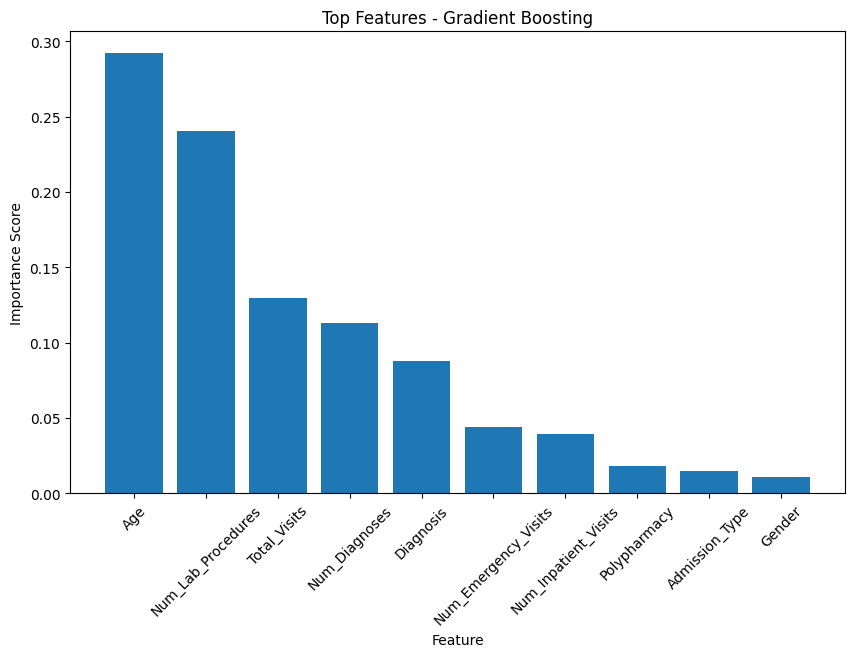

In [61]:
# Feature Importance Analysis
feature_importance = final_gb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

# Display the top N important features
top_n = 10
print(f"\nTop {top_n} Important Features:")
for i in range(top_n):
    print(f"{X_train_std.columns[sorted_idx[i]]}: {feature_importance[sorted_idx[i]]:.4f}")

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), feature_importance[sorted_idx][:top_n], align="center")
plt.xticks(range(top_n), X_train_std.columns[sorted_idx][:top_n], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Top Features - Gradient Boosting")
plt.show()


Key Findings from Feature Importance Analysis:

Age (29.19%):

Age is the most influential factor, significantly impacting the model's predictions. Higher age is a critical consideration.
Num_Lab_Procedures (24.04%):

The number of laboratory procedures is the second most important factor, indicating that the extent of medical testing strongly influences predictions.
Total_Visits (12.97%):

Total_Visits, encompassing various medical visits, is crucial, highlighting the overall impact of healthcare utilization.
Num_Diagnoses (11.32%):

The number of diagnoses is important, showcasing that the complexity of medical conditions significantly affects predictions.
Diagnosis (8.77%):

Specific diagnoses play a key role, indicating that the type of medical condition is a significant predictor.
Num_Emergency_Visits (4.43%):

The number of emergency visits is relevant, suggesting that emergency care usage contributes to predictions.
Num_Inpatient_Visits (3.95%):

The number of inpatient visits is vital, emphasizing the importance of hospitalizations in the model's decision-making.
Polypharmacy (1.81%):

Polypharmacy moderately impacts predictions, signifying the influence of using multiple medications.
Admission_Type (1.50%):

Admission type (e.g., elective, emergency) is a non-negligible factor influencing the model's outcomes.
Gender (1.10%):

Gender has a comparatively lower impact, indicating a modest influence on predictions compared to other features.
Overall Insights:

Demographics like age and gender hold significant importance.
Healthcare utilization metrics, including lab procedures, total visits, and emergency/inpatient care, are crucial.
Information about specific medical conditions and diagnoses is essential.
Polypharmacy and admission type also contribute to the model's decision-making.